<div style="
    border: 3px solid #0056b3;        /* Viền xanh đậm */
    border-radius: 10px;              /* Bo tròn góc */
    padding: 20px;
    margin: 20px 0;
    text-align: center;               /* Căn giữa toàn bộ nội dung */
    background-color: #e6f0ff;        /* Nền xanh nhạt */
    box-shadow: 5px 5px 10px #aaaaaa; /* Đổ bóng */
">
    <h1 style="color: #0056b3; margin-bottom: 5px;">
        ĐỒ ÁN CUỐI KÌ
    </h1>
    <h3 style="color: #333333; margin-top: 5px;">
        LẬP TRÌNH CHO KHOA HỌC DỮ LIỆU
    </h3>
</div>

<div style="
    margin-top: 20px;
    margin-bottom: 10px;
    padding-bottom: 5px;
    border-bottom: 4px solid #007bff; /* Thanh ngang màu xanh */
">
    <h2 style="color: #007bff; margin: 0; padding: 0;">
        KHÁM PHÁ DỮ LIỆU
    </h2>
</div>

<div style="
    /* Tối ưu hóa hiển thị trên mọi kích thước màn hình */
    box-sizing: border-box; 
    max-width: 100%; /* Đảm bảo không vượt quá chiều rộng của Notebook */
    overflow-x: hidden; /* Ngăn thanh cuộn ngang xuất hiện */
    
    /* Định dạng thẩm mỹ */
    border: 3px solid #ff9900;
    border-radius: 15px;
    padding: 20px;
    margin: 25px 0;
    background-color: #fffaf0;
    box-shadow: 4px 4px 10px rgba(0, 0, 0, 0.15);
">
    <p style="text-align: justify; line-height: 1.5; margin: 0;">
        Phần này nhóm sẽ **khám phá dataset bằng thống kê mô tả** để hiểu rõ cấu trúc, chất lượng dữ liệu và mối quan hệ giữa các thuộc tính. Nhóm sẽ xác định các giá trị thiếu, không hợp lệ hoặc kiểu dữ liệu không phù hợp, đồng thời phân tích tương quan giữa các biến số và kiểm tra các mối quan hệ giữa các thuộc tính phân loại và số. Qua đó, nhóm sẽ xác định các bước **tiền xử lý cần thiết** để dữ liệu trở nên rõ ràng, đầy đủ và dễ sử dụng cho các phân tích tiếp theo.
    </p>
</div>

<div style="
    border-left: 4px solid #3498db;  /* Thanh đứng màu xanh dương */
    padding: 5px 10px;
    margin: 15px 0 10px 0;
    background-color: #f7fbff;       /* Nền màu xanh dương nhạt */
">
    <h3 style="color: #3498db; margin: 0;">
        I. Đọc dữ liệu
    </h3>
</div>

Import và cài đặt các thư viện cần thiết

In [1]:
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

Đọc dataset lưu trong file `online_shoppers_intention.csv` vào dataframe `data` và in ra 5 dòng đầu tiên.

Đọc dataset lưu trong file `online_shoppers_intention.csv` vào dataframe `data` và in ra 5 dòng đầu tiên.

In [2]:
data = pd.read_csv("Data/online_shoppers_intention.csv")
data.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True,False


<div style="
    border-left: 4px solid #3498db;  /* Thanh đứng màu xanh dương */
    padding: 5px 10px;
    margin: 15px 0 10px 0;
    background-color: #f7fbff;       /* Nền màu xanh dương nhạt */
">
    <h3 style="color: #3498db; margin: 0;">
        II. Tổng quan dataset
    </h3>
</div>

<div style="
  margin: 18px 0 12px 0;
  padding: 6px 14px;
  border: 1px solid #dbeafe;
  border-radius: 8px;
  background-color: #f8fbff;
  display: inline-block;
">
  <h4 style="
    margin: 0;
    font-weight: 600;
  ">
    1. Thông tin cơ bản
  </h4>
</div>


<div style="margin: 14px 0 8px 0;">
  <h5 style="margin: 0; font-weight: 500;">
    ▸ Số hàng, số cột của tập dữ liệu? Kích thước tổng thể của tập dữ liệu?
  </h5>
</div>


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Administrative           12330 non-null  int64  
 1   Administrative_Duration  12330 non-null  float64
 2   Informational            12330 non-null  int64  
 3   Informational_Duration   12330 non-null  float64
 4   ProductRelated           12330 non-null  int64  
 5   ProductRelated_Duration  12330 non-null  float64
 6   BounceRates              12330 non-null  float64
 7   ExitRates                12330 non-null  float64
 8   PageValues               12330 non-null  float64
 9   SpecialDay               12330 non-null  float64
 10  Month                    12330 non-null  object 
 11  OperatingSystems         12330 non-null  int64  
 12  Browser                  12330 non-null  int64  
 13  Region                   12330 non-null  int64  
 14  TrafficType           

<div style="margin: 14px 0 8px 0;">
  <h5 style="margin: 0; font-weight: 500;">
    ▸ Mỗi dòng có ý nghĩa gì?
  </h5>
</div>


Mỗi hàng trong dataset là 1 phiên truy cập (1 session) của khách hàng, bao gồm số trang đã xem, thời gian truy cập, nguồn truy cập, các thông số liên quan đến việc truy cập ở các trang, thời gian truy cập, loại người dùng, thiết bị sử dụng và kết quả có dẫn đến giao dịch hay không. 

<div style="
  margin: 18px 0 12px 0;
  padding: 6px 14px;
  border: 1px solid #dbeafe;
  border-radius: 8px;
  background-color: #f8fbff;
  display: inline-block;
">
  <h4 style="
    margin: 0;
    font-weight: 600;
  ">
    2. Tính toàn vẹn dữ liệu
  </h4>
</div>


<div style="margin: 14px 0 8px 0;">
  <h5 style="margin: 0; font-weight: 500;">
    ▸ Có hàng trùng lặp không? Nếu có, bao nhiêu?
  </h5>
</div>


Tính tổng các hàng lặp có trong dataset. Nếu có hàng lặp, kết quả sẽ lớn hơn 0

In [4]:
have_duplicate_rows = data.duplicated().sum()
print("Số hàng trùng lặp: ", have_duplicate_rows)

Số hàng trùng lặp:  125


Ta thấy dataset vẫn xuất hiện 125 dòng trùng lặp. 

Vì mỗi dòng là 1 phiên truy cập của khách hàng, 2 phiên truy cập khác nhau khó có thể có tất cả các thuộc tính đều giống nhau, do đó, điều này có thể xuất phát từ lỗi log dữ liệu hoặc quá trình tổng hợp dataset. 

Nhóm quyết định loại bỏ các dòng trùng lặp để tránh ảnh hưởng đến phân phối dữ liệu và các phân tích tiếp theo.

In [5]:
print("Số dòng trước khi loại bỏ trùng lặp:", data.shape[0])

data = data.drop_duplicates()

print("Số dòng sau khi loại bỏ trùng lặp:", data.shape[0])

Số dòng trước khi loại bỏ trùng lặp: 12330
Số dòng sau khi loại bỏ trùng lặp: 12205


<div style="margin: 14px 0 8px 0;">
  <h5 style="margin: 0; font-weight: 500;">
    ▸ Có hàng hoàn toàn trống không?
  </h5>
</div>

Tính tổng tất cả các hàng có giá trị tất cả là `Null`. Nếu có hàng hoàn toàn trống, kết quả lớn hơn 0.

In [6]:
empty_rows = data.isnull().all(axis=1).sum()
print("Số hàng hoàn toàn trống:", empty_rows)

Số hàng hoàn toàn trống: 0


<div style="
  margin: 18px 0 12px 0;
  padding: 6px 14px;
  border: 1px solid #dbeafe;
  border-radius: 8px;
  background-color: #f8fbff;
  display: inline-block;
">
  <h4 style="
    margin: 0;
    font-weight: 600;
  ">
    3. Inventory các cột
  </h4>
</div>


<div style="margin: 14px 0 8px 0;">
  <h5 style="margin: 0; font-weight: 500;">
    ▸ Các cột quan trọng cho phân tích?
  </h5>
</div>

Trong các thông tin liên quan đến 1 session, `ProductRelated`, `ProductRelated_Duration`, `BounceRates`, `ExitRates`, `PageValues` theo đánh giá ban đầu là quan trọng nhất để đánh giá yếu tổ của website ảnh hưởng đến quyết định mua hàng của người dùng. `SpecialDay`, `Month` và `Weekend` là các yếu tố quan trọng về thời gian. `Revenue` là cột nhãn.

<div style="margin: 14px 0 8px 0;">
  <h5 style="margin: 0; font-weight: 500;">
    ▸ Cột nào có thể loại bỏ? Lý do?
  </h5>
</div>

Theo quan sát ban đầu, không có cột nào nên được loại bỏ, vì không có cột định danh hay dư thừa. Các cột đều là thông tin thống kê của 1 phiên truy cập của khách hàng, và đều có khả năng ảnh hưởng đến quyết định mua hàng của người dùng.  

<div style="
  margin: 18px 0 12px 0;
  padding: 6px 14px;
  border: 1px solid #dbeafe;
  border-radius: 8px;
  background-color: #f8fbff;
  display: inline-block;
">
  <h4 style="
    margin: 0;
    font-weight: 600;
  ">
    4. Kiểu dữ liệu
  </h4>
</div>


<div style="margin: 14px 0 8px 0;">
  <h5 style="margin: 0; font-weight: 500;">
    ▸ Kiểu dữ liệu hiện tại của từng cột
  </h5>
</div>

Dữ liệu của cột được lưu vào series `col_dtypes`.

Series này có index là tên các cột và giá trị là kiểu dữ liệu của các cột tương ứng.

In [7]:
col_dtype = data.dtypes
col_dtype

Administrative               int64
Administrative_Duration    float64
Informational                int64
Informational_Duration     float64
ProductRelated               int64
ProductRelated_Duration    float64
BounceRates                float64
ExitRates                  float64
PageValues                 float64
SpecialDay                 float64
Month                       object
OperatingSystems             int64
Browser                      int64
Region                       int64
TrafficType                  int64
VisitorType                 object
Weekend                       bool
Revenue                       bool
dtype: object

<div style="margin: 14px 0 8px 0;">
  <h5 style="margin: 0; font-weight: 500;">
    ▸ Cột nào có kiểu dữ liệu không phù hợp và cần chuyển đổi kiểu dữ liệu?
  </h5>
</div>

Ta thấy có 2 cột có kiểu dữ liệu object là `Month` và `VisitorType`. 

Đầu tiên xem dữ liệu unique của 2 cột này.

In [8]:
data['Month'].unique()

array(['Feb', 'Mar', 'May', 'Oct', 'June', 'Jul', 'Aug', 'Nov', 'Sep',
       'Dec'], dtype=object)

In [9]:
data['VisitorType'].unique()

array(['Returning_Visitor', 'New_Visitor', 'Other'], dtype=object)

Ta thấy đây là 2 kiểu dữ liệu categorical, do đó, trước tiên đổi thành kiểu dữ liệu category trong pandas để thuận tiện trực quan dữ liệu.

Vì tháng là kiểu dữ liệu có thứ tự nên ta đặt thứ tự cho các tháng trong năm.

In [10]:
months_ordered = ['Jan','Feb','Mar','Apr','May','June','Jul','Aug','Sep','Oct','Nov','Dec']
data['Month'] = pd.Categorical(data['Month'], categories=months_ordered, ordered=True)

In [11]:
data['VisitorType'] = data['VisitorType'].astype('category')

<div style="margin: 14px 0 8px 0;">
  <h5 style="margin: 0; font-weight: 500;">
    ▸ Chia kiểu dữ liệu theo numerical và categorical
  </h5>
</div>

Lưu tên của các thuộc tính categorical vào `categorical_cols` và các thuộc tính numerical vào `numerical_cols`

In [12]:
categorical_cols = [
    'Month', 'OperatingSystems', 'Browser', 'Region',
    'TrafficType', 'VisitorType', 'Weekend', 'Revenue'
]

numerical_cols = [
    'Administrative', 'Administrative_Duration',
    'Informational', 'Informational_Duration',
    'ProductRelated', 'ProductRelated_Duration',
    'BounceRates', 'ExitRates', 'PageValues', 'SpecialDay'
]

<div style="
    border-left: 4px solid #3498db;  /* Thanh đứng màu xanh dương */
    padding: 5px 10px;
    margin: 15px 0 10px 0;
    background-color: #f7fbff;       /* Nền màu xanh dương nhạt */
">
    <h3 style="color: #3498db; margin: 0;">
        III. Về các cột Numerical
    </h3>
</div>

In [13]:
df = pd.DataFrame(data)

numerical_df = df[numerical_cols]
numerical_df

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay
0,0,0.0,0,0.0,1,0.000000,0.200000,0.200000,0.000000,0.0
1,0,0.0,0,0.0,2,64.000000,0.000000,0.100000,0.000000,0.0
2,0,0.0,0,0.0,1,0.000000,0.200000,0.200000,0.000000,0.0
3,0,0.0,0,0.0,2,2.666667,0.050000,0.140000,0.000000,0.0
4,0,0.0,0,0.0,10,627.500000,0.020000,0.050000,0.000000,0.0
...,...,...,...,...,...,...,...,...,...,...
12325,3,145.0,0,0.0,53,1783.791667,0.007143,0.029031,12.241717,0.0
12326,0,0.0,0,0.0,5,465.750000,0.000000,0.021333,0.000000,0.0
12327,0,0.0,0,0.0,6,184.250000,0.083333,0.086667,0.000000,0.0
12328,4,75.0,0,0.0,15,346.000000,0.000000,0.021053,0.000000,0.0


In [14]:
# FUNCTION FOR SUMMARY TABLE
def print_summary_table(df):
    # Lấy danh sách các cột là kiểu số
    num_cols = df.select_dtypes(include=['number']).columns

    # 1. Định nghĩa khuôn mẫu định dạng (Width cho mỗi cột)
    # Tên biến (20) | Range (20) | Mean (10) | Median (10) | Std Dev (10) | Unique (10) | Missing (10)
    header_fmt = "{:<20} | {:<20} | {:<10} | {:<10} | {:<10} | {:<10} | {:<10}"
    row_fmt    = "{:<20} | {:<20} | {:<10.2f} | {:<10.2f} | {:<10.2f} | {:<10} | {:<10}"

    # 2. In Header
    print("-" * 105)
    print(header_fmt.format("Feature Name", "Range [Min-Max]", "Mean", "Median", "Std Dev", "Unique", "Missing"))
    print("-" * 105)

    # 3. Duyệt qua từng cột và in dữ liệu
    for col in num_cols:
        # Tính toán các giá trị
        min_val = df[col].min()
        max_val = df[col].max()
        range_str = f"[{min_val}, {max_val}]"
        
        mean_val = df[col].mean()
        median_val = df[col].median()
        std_val = df[col].std()
        unique_val = df[col].nunique()
        missing_val = df[col].isnull().sum()

        # In dòng dữ liệu theo định dạng
        print(row_fmt.format(
            col[:20],      # Giới hạn tên cột nếu quá dài
            range_str[:20], # Giới hạn chuỗi range nếu quá dài
            mean_val, 
            median_val, 
            std_val, 
            unique_val,
            missing_val
        ))

    print("-" * 105)

In [15]:
# FUNCTION FOR FINDING GENERAL INFORMATION ABOUT NUMERICAL COLUMNS

# --- A. DISTRIBUTION & CENTRAL TENDENCY ---
def distri_num_col_info(col):
    mean_val = df[col].mean()
    median_val = df[col].median()
    std_val = df[col].std()
    skewness = df[col].skew()
    
    print(f"\n1. Xu hướng tập trung:")
    print(f"   - Mean (Trung bình): {mean_val:.2f}")
    print(f"   - Median (Trung vị): {median_val:.2f}")
    print(f"   - Std Dev (Độ lệch chuẩn): {std_val:.2f}")
    print(f"   - Skewness (Độ lệch): {skewness:.2f}")
    
    # Đánh giá hình dáng phân phối
    if -0.5 < skewness < 0.5: shape = "Đối xứng (Normal-like)"
    elif skewness <= -0.5: shape = "Lệch trái (Left Skewed)"
    else: shape = "Lệch phải (Right Skewed)"
    print(f"\t-> Phân phối dữ liệu: {shape}")

    
# --- B. RANGE & OUTLIERS ---
def range_outliers_num_col_info(col):
    min_val = df[col].min()
    max_val = df[col].max()
    
    # Tính IQR để tìm Outliers
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)][col]
    
    print(f"\n2. Phạm vi & Outliers:")
    print(f"   - Min: {min_val} | Max: {max_val}")
    print(f"   - Q1(25%): {Q1} | Q3(75%): {Q3} | IQR: {IQR}")
    print(f"   - Lower Bound: {lower_bound} | Upper Bound: {upper_bound}")
    print(f"   - Số lượng Outliers (IQR method): {len(outliers)} | Chiếm {len(outliers)/len(df[col])*100:.2f}%")

    # return outliers

# --- C. DATA QUALITY ---
def data_quality_num_col_info(col, valid_range =  None, suspicious_values = None):
    # - valid_range: Tuple (min, max). Ngoài khoảng này là Impossible.
    # - suspicious_values: List các giá trị nghi ngờ là placeholder. VD [999, -1]
    
    missing_count = df[col].isnull().sum()
    missing_pct = df[col].isnull().mean() * 100
    zeros_count = (df[col] == 0).sum()
    negatives_count = (df[col] < 0).sum()

    # Impossible Values dựa trên valid range
    impossible_count = 0
    if valid_range:
        min_val, max_val = valid_range
        # Đếm số lượng nằm ngoài khoảng min-max
        impossible_mask = (df[col]< min_val) | (df[col] > max_val)
        impossible_count = impossible_mask.sum()
        impossible_desc = f"Ngoài khoảng [{min_val}, {max_val}]"
        
    # 4. Placeholder Values dựa trên suspicious value 
    placeholder_count = 0
    if suspicious_values:
        placeholder_count = df[col].isin(suspicious_values).sum()

    
    print(f"\n3. Chất lượng dữ liệu:")
    # print(f"   - Missing Count: {missing_count} | Missing Percentage: {missing_pct:.2f}%")
    # print(f"   - Giá trị bằng 0: {zeros_count}")
    # print(f"   - Negative Values: {negatives_count}")
    print(f"   - Impossible Values: {impossible_count}")
    print(f"   - Placeholders Values: {placeholder_count}")
    print("\n")
    


In [16]:
# FUNCTION FOR VISUALIZATION
def visualtion(col):
    # Khung vẽ, Hình 1 là Hist, Hình 2 là Box
    fig, axes = plt.subplots(1, 2, figsize=(15, 4))

    # Vẽ Histogram
    sns.histplot(data=df, x=col, kde=True, ax=axes[0], color='skyblue')
    axes[0].set_title(f'Phân phối (Histogram) của {col}')

    # Vẽ Box Plot
    sns.boxplot(data=df, x=col, ax=axes[1], color='lightcoral')
    axes[1].set_title(f'Outliers (Boxplot) của {col}')

    plt.show()

<div style="margin: 22px 0 16px 0;">
  <h4 style="
    margin: 0;
    display: inline-block;
    padding: 8px 18px;
    font-weight: 700;
    letter-spacing: 0.6px;
    color: #1e3a8a;
    border-radius: 10px;
    background: linear-gradient(90deg, #e0f2fe, #f0f9ff);
    border: 1px solid #bae6fd;
  ">
    MÔ TẢ TỔNG QUAN DỮ LIỆU SỐ HỌC – NUMERICAL
  </h4>
</div>


In [17]:
print_summary_table(df)

---------------------------------------------------------------------------------------------------------
Feature Name         | Range [Min-Max]      | Mean       | Median     | Std Dev    | Unique     | Missing   
---------------------------------------------------------------------------------------------------------
Administrative       | [0, 27]              | 2.34       | 1.00       | 3.33       | 27         | 0         
Administrative_Durat | [0.0, 3398.75]       | 81.65      | 9.00       | 177.49     | 3335       | 0         
Informational        | [0, 24]              | 0.51       | 0.00       | 1.28       | 17         | 0         
Informational_Durati | [0.0, 2549.375]      | 34.83      | 0.00       | 141.42     | 1258       | 0         
ProductRelated       | [0, 705]             | 32.05      | 18.00      | 44.59      | 311        | 0         
ProductRelated_Durat | [0.0, 63973.52223]   | 1206.98    | 608.94     | 1919.60    | 9551       | 0         
BounceRates          | [0

Tổng quan dữ liệu cho thấy các cột dữ liệu đều không có dữ liệu thiếu, nên phần trăm dữ liệu thiếu luôn bằng 0%, **dữ liệu đầy đủ**.

#### 1.1: Thống kê cho cột Administrative



1. Xu hướng tập trung:
   - Mean (Trung bình): 2.34
   - Median (Trung vị): 1.00
   - Std Dev (Độ lệch chuẩn): 3.33
   - Skewness (Độ lệch): 1.95
	-> Phân phối dữ liệu: Lệch phải (Right Skewed)

2. Phạm vi & Outliers:
   - Min: 0 | Max: 27
   - Q1(25%): 0.0 | Q3(75%): 4.0 | IQR: 4.0
   - Lower Bound: -6.0 | Upper Bound: 10.0
   - Số lượng Outliers (IQR method): 404 | Chiếm 3.31%

3. Chất lượng dữ liệu:
   - Impossible Values: 0
   - Placeholders Values: 0




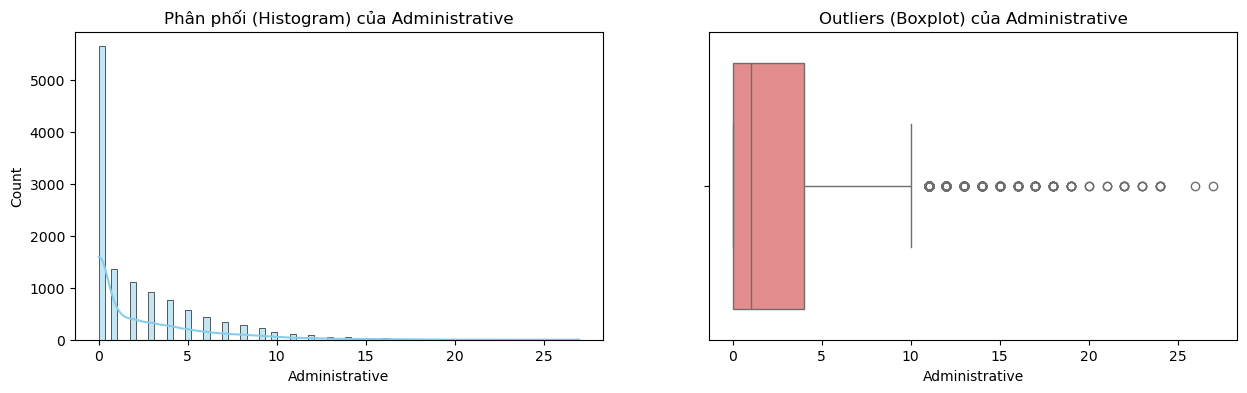

In [18]:
col = 'Administrative'
# Distribution & Central tendency
distri_num_col_info(col) 
# Range & Outliers
range_outliers_num_col_info(col)
float('inf')
# Data quality
data_quality_num_col_info(col, valid_range = (0,np.inf), suspicious_values = [-1, -9, -99, 99, 999, 9999] )
visualtion(col)

#### 1.2 Phân tích về thống kê cột dữ liệu số Administrative
  * **Phân phối và Xu hướng trung tâm**
    * **Lệch phải nặng (Right-Skewed):** Phần lớn dữ liệu tập trung tại giá trị 0, cho thấy đa số người dùng không truy cập trang quản trị.
    * **Chênh lệch Mean - Median:** Do đuôi dài về phía bên phải, giá trị trung bình (**Mean**) cao hơn trung vị (**Median**). Cụ thể, 50% dữ liệu nằm sát mức 0.

* **3. Về Độ Phân Tán & Outliers (Range & Outliers)**
    * **Khoảng giá trị:** Dữ liệu từ 0 đến 27, trong đó 75% tập trung từ 0 đến 4 (**IQR hẹp**), cho thấy sự biến động thấp ở nhóm đa số.
    * **Ngoại lai (Outliers):** Xuất hiện nhiều điểm từ **>10 đến 27**.
       * **Genuine Extreme Values or Data Entry Errors:** Ở góc độ Data Quality: Các outliers này là **dữ liệu thực (natural outliers)** chứ không phải lỗi nhập liệu. Vì chúng phân bố liên tục chứ không nhảy vọt lên (như 1000 hoặc số âm). Đây có thể là những nhóm khách hàng đặc biệt, hành động khác hẳn số đông. Vậy kết luận, các **outliers** này là **genuine extreme values**, có thể là nhóm những người có nhu cầu quản trị cao hơn hẳn người bình thường.

* **Chất lượng dữ liệu (Data Quality)**
    * **Dữ liệu sạch:** Không có giá trị phi lý.
    * **Ý nghĩa:** Giá trị 0 chiếm ưu thế nhưng mang ý nghĩa hành vi (không truy cập), không phải dữ liệu rỗng.

#### 2.1 Thống kê cho cột Administrative Duration


1. Xu hướng tập trung:
   - Mean (Trung bình): 81.65
   - Median (Trung vị): 9.00
   - Std Dev (Độ lệch chuẩn): 177.49
   - Skewness (Độ lệch): 5.59
	-> Phân phối dữ liệu: Lệch phải (Right Skewed)

2. Phạm vi & Outliers:
   - Min: 0.0 | Max: 3398.75
   - Q1(25%): 0.0 | Q3(75%): 94.7 | IQR: 94.7
   - Lower Bound: -142.05 | Upper Bound: 236.75
   - Số lượng Outliers (IQR method): 1149 | Chiếm 9.41%

3. Chất lượng dữ liệu:
   - Impossible Values: 0
   - Placeholders Values: 0




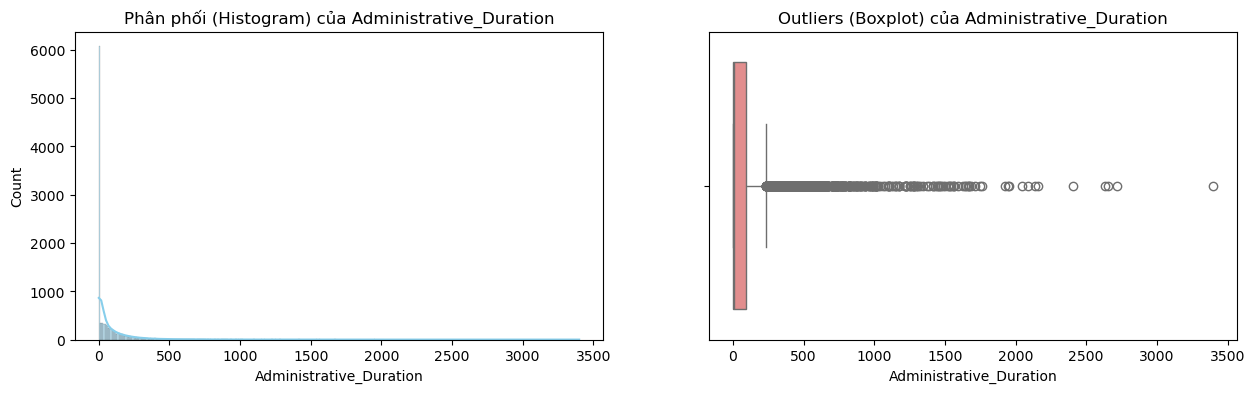

In [19]:
col = 'Administrative_Duration'
# Distribution & Central tendency
distri_num_col_info(col) 
# Range & Outliers
range_outliers_num_col_info(col)
float('inf')
# Data quality
data_quality_num_col_info(col, valid_range = (0,np.inf), suspicious_values = [-1, -999] )
visualtion(col)

#### 2.2 Phân tích về thống kê cột Administrative Duration
* **1. Về Phân phối và Xu hướng trung tâm**
  * **Dạng phân phối:** Lệch phải rất nặng (Highly Right-Skewed). Đỉnh (Mode) tập trung tại giá trị 0, đồng nhất với dữ liệu cột Administrative.
  * **Mean-Median:**Trung bình bị kéo lên bởi các phiên truy cập kéo dài. Hơn 50% dữ liệu chỉ tập trung ở mức thời gian rất thấp.
* **2. Về Độ Phân Tán & Outliers (Range & Outliers)**
    * **Range**: Rất lớn (từ 0 đến ~3400 giây). Tuy nhiên, hộp dữ liệu (IQR) bị nén hẹp ở mức thấp (<100 giây), cho thấy sự đồng nhất về hành vi "truy cập nhanh" ở đại đa số người dùng.
    * **Outliers (ngoại lai)**: Xuất hiện dày đặc từ sau mức ~250 giây đến 3400 giây.
       * **Genuine Extreme Values or Data Entry Errors:** Ở góc độ Data Quality, các outliers này là **dữ liệu thực (genuine extreme values)**. Thời gian 3400 giây (tương đương gần 1 giờ) là hoàn toàn khả thi đối với hành vi người dùng (có thể họ đang đọc kỹ điều khoản, hoặc đơn giản là treo máy/mở tab để đó). Sự phân bố liên tục của các điểm đen chứng tỏ không có sự đứt gãy dữ liệu vô lý.
* **Chất lượng dữ liệu (Data Quality)**
  * Dữ liệu sạch, hợp lý về mặt logic thời gian.

#### 3.1 Thống kê cho cột Informational


1. Xu hướng tập trung:
   - Mean (Trung bình): 0.51
   - Median (Trung vị): 0.00
   - Std Dev (Độ lệch chuẩn): 1.28
   - Skewness (Độ lệch): 4.01
	-> Phân phối dữ liệu: Lệch phải (Right Skewed)

2. Phạm vi & Outliers:
   - Min: 0 | Max: 24
   - Q1(25%): 0.0 | Q3(75%): 0.0 | IQR: 0.0
   - Lower Bound: 0.0 | Upper Bound: 0.0
   - Số lượng Outliers (IQR method): 2631 | Chiếm 21.56%

3. Chất lượng dữ liệu:
   - Impossible Values: 0
   - Placeholders Values: 0




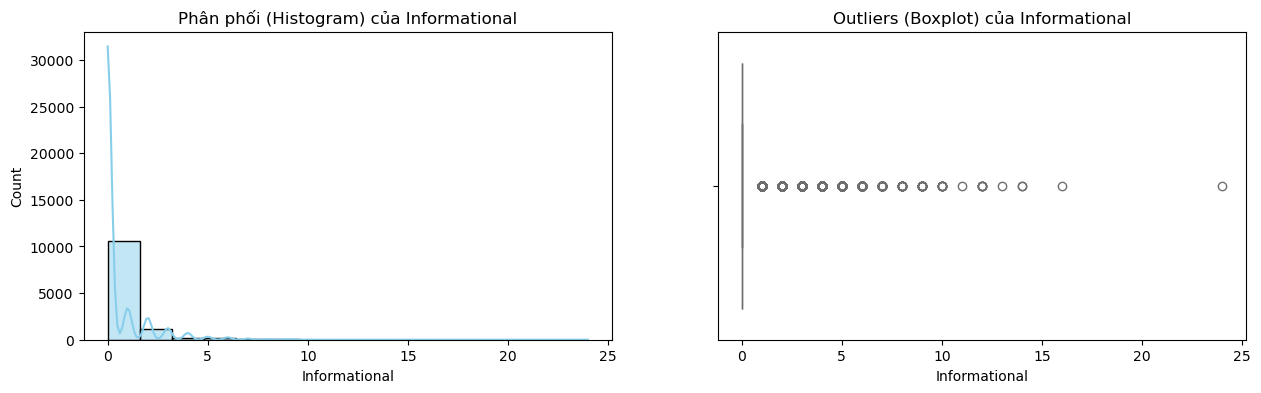

In [20]:
col = 'Informational'
# Distribution & Central tendency
distri_num_col_info(col) 
# Range & Outliers
range_outliers_num_col_info(col)
float('inf')
# Data quality
data_quality_num_col_info(col, valid_range = (0,np.inf), suspicious_values = [-1, -999, 99, 9999] )
visualtion(col)

#### 3.2 Phân tích về thống kê cột Informational
* **1. Phân phối & Xu hướng trung tâm:**
  * **Dạng phân phối:** Dữ liệu bị **lệch phải cực kỳ nặng (Extremely Right-Skewed)**. Đỉnh (Mode) và Trung vị (Median) đều bằng 0, cho thấy hơn 75% người dùng không truy cập trang thông tin.
  * **Mean > Median:** Giá trị trung bình bị kéo lên bởi các số lượt xem nhỏ (từ 1 đến 24), dù số lượng người truy cập rất ít.
* **2. Về Độ Phân Tán & Outliers (Range & Outliers)**
    * **IQR (Interquartile Range):** IQR = 0, cho thấy sự biến động ở nhóm đa số gần như bằng không.
    * **Outliers (Giá trị ngoại lai)**
       * Bất kì giá trị nào lớn hơn 1 đều được xem là ngoại lai so với đám đông.
     * **Genuine Extreme Values or Data Entry Errors:** Các outliers này là **dữ liệu thực (genuine values)**. Việc người dùng xem 1, 2, hay thậm chí 24 trang thông tin là hành vi hoàn toàn bình thường và khả thi trên một website thương mại điện tử, phản ánh hành vi bình thường của một nhóm nhỏ khách hàng có quan tâm đến thông tin.
* **Chất lượng dữ liệu (Data Quality)**
    * Phản ánh chính xác thực tế là người dùng thường ít xem các trang "Informational" so với các loại trang khác trên website thương mại điện tử.
  

#### 4.1 Thống kê cho cột Information Duration


1. Xu hướng tập trung:
   - Mean (Trung bình): 34.83
   - Median (Trung vị): 0.00
   - Std Dev (Độ lệch chuẩn): 141.42
   - Skewness (Độ lệch): 7.54
	-> Phân phối dữ liệu: Lệch phải (Right Skewed)

2. Phạm vi & Outliers:
   - Min: 0.0 | Max: 2549.375
   - Q1(25%): 0.0 | Q3(75%): 0.0 | IQR: 0.0
   - Lower Bound: 0.0 | Upper Bound: 0.0
   - Số lượng Outliers (IQR method): 2405 | Chiếm 19.71%

3. Chất lượng dữ liệu:
   - Impossible Values: 0
   - Placeholders Values: 0




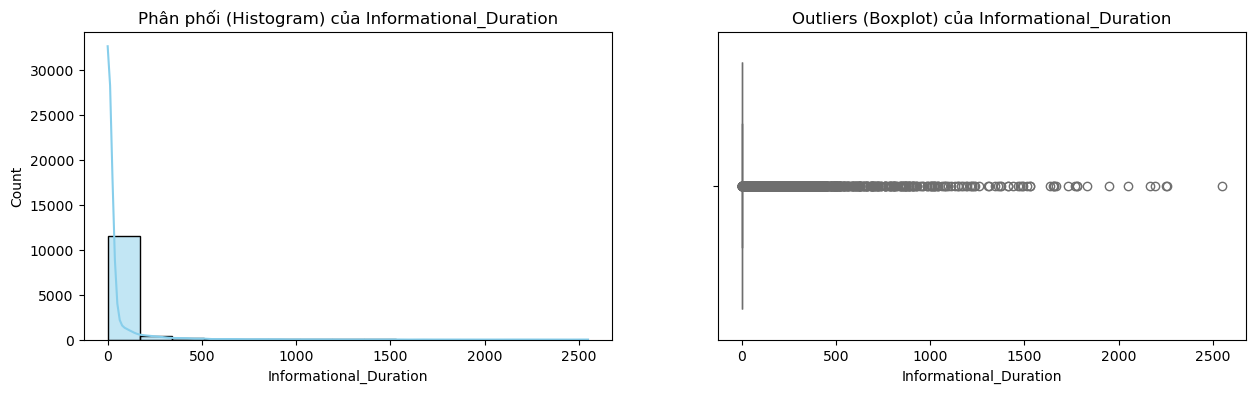

In [21]:
col = 'Informational_Duration'
# Distribution & Central tendency
distri_num_col_info(col) 
# Range & Outliers
range_outliers_num_col_info(col)
float('inf')
# Data quality
data_quality_num_col_info(col, valid_range = (0,np.inf), suspicious_values = [-1, -9, -99] )
visualtion(col)

#### 4.2 Phân tích về thống kê cột Information Duration
* **1. Phân phối và xu hướng trung tâm** 
  * **Dạng phân phối:** Dữ liệu bị **lệch phải cực kì nặng (Extremely Right-Skewed)**. Đa số người dùng dành 0 giây cho các trang thông tin (Mode & Median = 0).
  * **Mean > Meadian:** Giá trị trung bình bị kéo cao đáng kể bởi một nhóm nhỏ người dùng có thời gian truy cập rất lâu (đuôi biểu đồ kéo dài tới >2500s).
* **2. Độ phân tán & Outliers:**
    * **Biến động thấp ở nhóm đa số:** IQR bằng 0 (Q1 = Q3 = 0), cho thấy hành vi "không xem" là đồng nhất ở phần lớn dữ liệu.
    * **Outliers (Giá trị ngoại lai):** Xuất hiện dải Outliers dày đặc từ >0 đến hơn 2500 giây (~41 phút). Đây là dữ liệu thực (natural outliers), phản ánh nhóm khách hàng kỹ tính dành nhiều thời gian nghiên cứu thông tin/chính sách.
* **3. Chất lượng dữ liệu (Data Quality)**
    * Dữ liệu sạch và hợp lý về mặt logic. Tuy nhiên, do phần lớn dữ liệu tập trung tại 0, cột này có độ lệch rất cao, cần cân nhắc kỹ thuật xử lý (như phân nhóm người (nhóm có thời gian xem trên 0 và bằng 0))

#### 5.1 Thống kê cho cột Product Related


1. Xu hướng tập trung:
   - Mean (Trung bình): 32.05
   - Median (Trung vị): 18.00
   - Std Dev (Độ lệch chuẩn): 44.59
   - Skewness (Độ lệch): 4.33
	-> Phân phối dữ liệu: Lệch phải (Right Skewed)

2. Phạm vi & Outliers:
   - Min: 0 | Max: 705
   - Q1(25%): 8.0 | Q3(75%): 38.0 | IQR: 30.0
   - Lower Bound: -37.0 | Upper Bound: 83.0
   - Số lượng Outliers (IQR method): 1007 | Chiếm 8.25%

3. Chất lượng dữ liệu:
   - Impossible Values: 0
   - Placeholders Values: 0




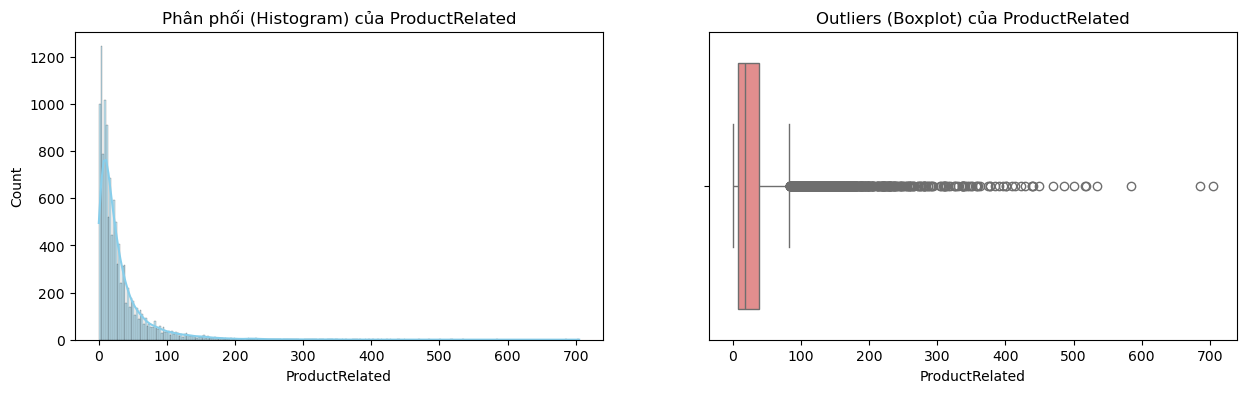

In [22]:
col = 'ProductRelated'
# Distribution & Central tendency
distri_num_col_info(col) 
# Range & Outliers
range_outliers_num_col_info(col)
float('inf')
# Data quality
data_quality_num_col_info(col, valid_range = (0,np.inf), suspicious_values = [-1, -9, -99, 9999] )
visualtion(col)

#### 5.2 Phân tích về thống kê cột Product Related
* **1. Phân phối & Xu hướng trung tâm:**
  * **Lệch phải (Right-Skewed)**: Tuy vẫn lệch phải nhưng phân phối "thoải" hơn hẳn các cột khác. Đỉnh tập trung ở khoảng 0–30 trang, cho thấy lướt sản phẩm là hoạt động chính của người dùng.
  * **Trung vị (Median = 18.00):** Khác biệt rõ rệt khi Median không nằm ở mức 0, phản ánh một người dùng bình thường xem khoảng 18 sản phẩm.
  * **Mean (31.71) > Median:** Giá trị trung bình bị đẩy lên cao do tác động của nhóm ngoại lai cực lớn.

* **2. Độ phân tán & Outliers:**
    * **Độ biến thiên cao (IQR = 31):** Khoảng tứ phân vị rộng cho thấy hành vi xem sản phẩm của khách hàng phổ thông rất đa dạng.
    * **Outliers (Giá trị ngoại lai)**: Xuất hiện dày đặc từ 100 đến hơn 700.
       * Biểu đồ Boxplot cho thấy một lượng **Outliers khổng lồ và dày đặc**. Các outliers xuất hiện và xuất hiện dày đặc từ khoảng giá trị 100 và kéo dài liên tục đến hơn 700.
    * **Đánh giá ngoại lai:** Phần lớn là **dữ liệu thực (genuine values)** từ nhóm khách hàng "window shopping" hoặc có nhu cầu mua sắm lớn. Các giá trị cực cao (>500) có thể là hành vi của Bot hoặc Crawler nhưng vẫn giữ tính liên tục, không có dấu hiệu lỗi nhập liệu.

* **Chất lượng dữ liệu (Data Quality)**
    * Cột dữ liệu "sạch" và giàu thông tin nhất (High Information Gain), do có sự phân hóa hành vi rõ rệt giữa các nhóm người dùng.n loại hành vi người dùng trong mô hình dự đoán
    * Không có giá trị phi lý, phản ánh đúng bản chất website thương mại điện tử.

#### 6.1 Thống kê cho cột Product Related Duration


1. Xu hướng tập trung:
   - Mean (Trung bình): 1206.98
   - Median (Trung vị): 608.94
   - Std Dev (Độ lệch chuẩn): 1919.60
   - Skewness (Độ lệch): 7.25
	-> Phân phối dữ liệu: Lệch phải (Right Skewed)

2. Phạm vi & Outliers:
   - Min: 0.0 | Max: 63973.52223
   - Q1(25%): 193.0 | Q3(75%): 1477.154762 | IQR: 1284.154762
   - Lower Bound: -1733.2321429999997 | Upper Bound: 3403.3869049999994
   - Số lượng Outliers (IQR method): 951 | Chiếm 7.79%

3. Chất lượng dữ liệu:
   - Impossible Values: 0
   - Placeholders Values: 10




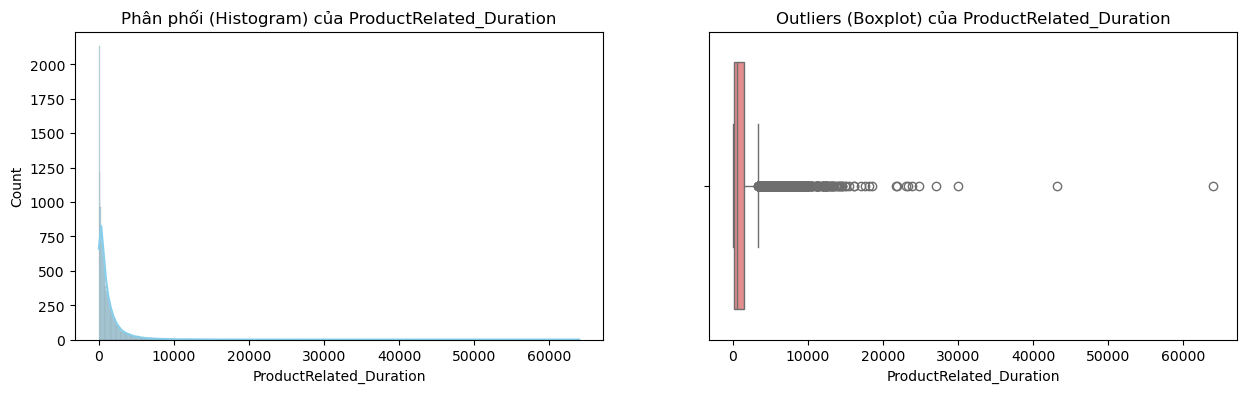

In [23]:
col = 'ProductRelated_Duration'
# Distribution & Central tendency
distri_num_col_info(col) 
# Range & Outliers
range_outliers_num_col_info(col)
float('inf')
# Data quality
data_quality_num_col_info(col, valid_range = (0,np.inf), suspicious_values = [-1, -9, -99, 99, 999, 9999] )
visualtion(col)

#### 6.2 Phân tích về thống kê cột Product Related Duration
* **1. Phân phối và xu hướng trung tâm:**
  * **Lệch phải nặng (Highly Right-Skewed):** Dữ liệu bị **lệch phải nặng (Highly Right-Skewed)**. Tuy nhiên, đường cong có độ thoải, cho thấy người dùng thực sự dành thời gian tương tác thay vì rời đi ngay.

  * **Chênh lệch Mean - Median:** Mean (1194.75s) cao gấp đôi Median (598.94s) do bị kéo bởi các giá trị ngoại lai cực lớn. Một người dùng bình thường dành khoảng 10 phút (598s) để xem sản phẩm.
* **2. Độ phân tán & Outliers:**
    * **Khoảng biến thiên rộng:** NDữ liệu từ 0 đến 63.973s (~17 giờ). Đây là cột có độ biến thiên lớn nhất trong các chỉ số thời gian.
    * **Bản chất ngoại lai:** Được xác định là **dữ liệu thực (genuine values)** về mặt kỹ thuật. Nhóm >20.000s có thể là hành vi "treo máy" (mở tab rồi bỏ đó) hoặc Bot, trong khi nhóm <5.000s phản ánh phiên mua sắm tích cực của người dùng kỹ tính.
* **3. Chất lượng dữ liệu (Data Quality):**
    * Dữ liệu sạch, hợp lệ, không có lỗi nhập liệu thủ công (do hệ thống ghi tự động).
    * Độ biến thiên cao giúp phân loại rõ rệt giữa khách hàng vãng lai và khách hàng tiềm năng.

#### 7.1 Thống kê cho cột Bounce Rate


1. Xu hướng tập trung:
   - Mean (Trung bình): 0.02
   - Median (Trung vị): 0.00
   - Std Dev (Độ lệch chuẩn): 0.05
   - Skewness (Độ lệch): 3.16
	-> Phân phối dữ liệu: Lệch phải (Right Skewed)

2. Phạm vi & Outliers:
   - Min: 0.0 | Max: 0.2
   - Q1(25%): 0.0 | Q3(75%): 0.016666667 | IQR: 0.016666667
   - Lower Bound: -0.0250000005 | Upper Bound: 0.041666667500000004
   - Số lượng Outliers (IQR method): 1428 | Chiếm 11.70%

3. Chất lượng dữ liệu:
   - Impossible Values: 0
   - Placeholders Values: 0




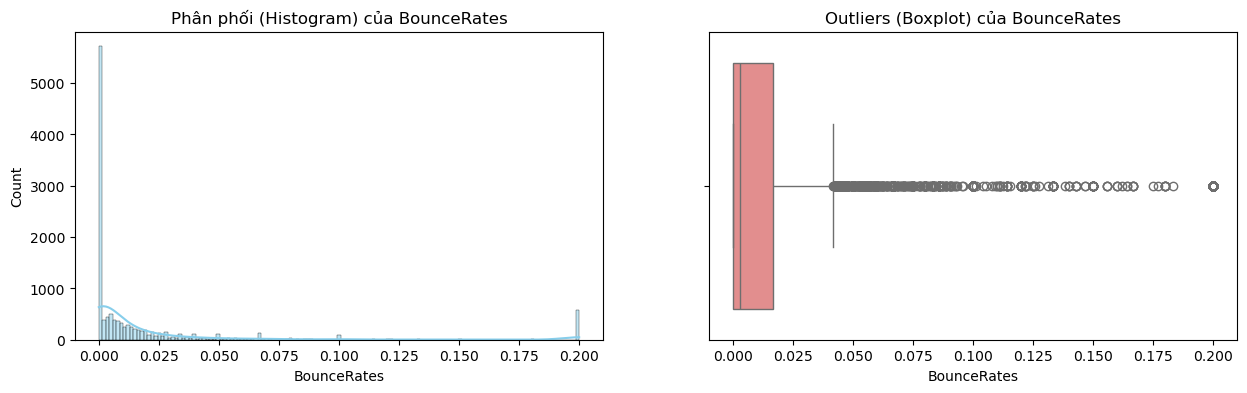

In [24]:
col = 'BounceRates'
# Distribution & Central tendency
distri_num_col_info(col) 
# Range & Outliers
range_outliers_num_col_info(col)
float('inf')
# Data quality
data_quality_num_col_info(col, valid_range = (0,np.inf), suspicious_values = [-1, -9, -99, 99, 999, 9999] )
visualtion(col)

#### 7.2 Phân tích về thống kê cột Bounce Rate
* **1. Phân phối & Xu thế trung tâm**
  * **Lệch phải cực kỳ nặng (Extremely Right-Skewed):** Phần lớn dữ liệu tập trung tại giá trị 0.00 (Mode & Median = 0.00). Điều này cho thấy đa số phiên truy cập có sự tương tác tốt, không thoát ngay lập tức.

  * **Mean > Median:** Giá trị trung bình (0.02) bị kéo lên bởi các giá trị thoát cao phía đuôi đồ thị. Đặc biệt, có một đỉnh phụ xuất hiện tại mốc cực đại 0.20.

* **2. Về Độ Phân Tán & Outliers (Range & Outliers)**
    * **IQR rất hẹp:** Dao động chủ yếu từ 0.00 đến 0.02, chứng tỏ hành vi của nhóm người dùng phổ thông rất đồng nhất (tỉ lệ thoát rất thấp).
    * **Outliers (Ngoại lai)**: Xuất hiện dày đặc từ 0.05 đến 0.20.
    * **Bản chất ngoại lai:** Được xác định là **dữ liệu thực (genuine values)**. Nhóm tập trung tại mốc 0.20 đại diện cho các phiên truy cập không có sự tương tác hoặc người dùng rời đi ngay sau khi vào trang đích.
* **Chất lượng dữ liệu (Data Quality)**
    * Nhìn chung, dữ liệu sạch. Sự tập trung lớn tại mức 0 phản ánh website có nội dung khá lôi cuốn hoặc cấu trúc trang giữ chân người dùng tốt.
        

#### 8.1 Thống kê cho cột Exit Rate


1. Xu hướng tập trung:
   - Mean (Trung bình): 0.04
   - Median (Trung vị): 0.03
   - Std Dev (Độ lệch chuẩn): 0.05
   - Skewness (Độ lệch): 2.23
	-> Phân phối dữ liệu: Lệch phải (Right Skewed)

2. Phạm vi & Outliers:
   - Min: 0.0 | Max: 0.2
   - Q1(25%): 0.014230973 | Q3(75%): 0.048529412 | IQR: 0.034298439
   - Lower Bound: -0.0372166855 | Upper Bound: 0.0999770705
   - Số lượng Outliers (IQR method): 1325 | Chiếm 10.86%

3. Chất lượng dữ liệu:
   - Impossible Values: 0
   - Placeholders Values: 0




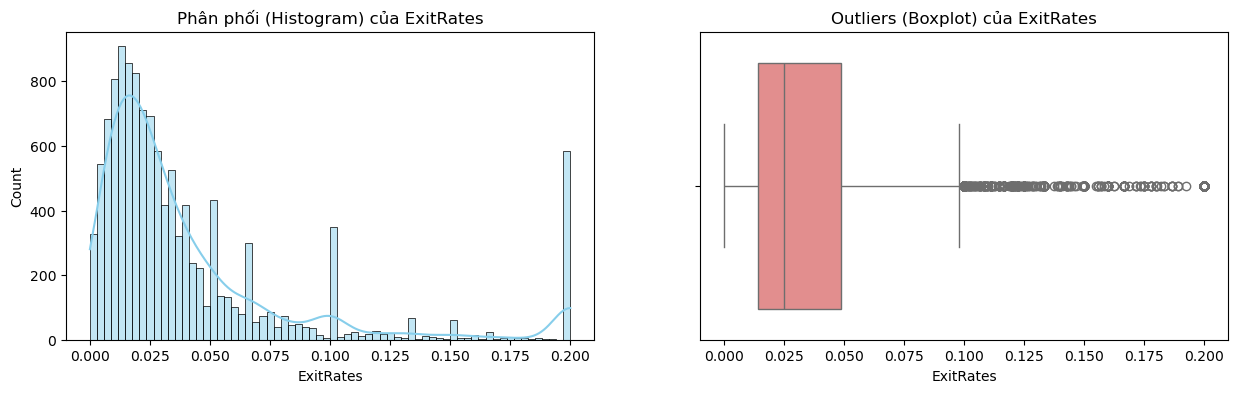

In [25]:
col = 'ExitRates'
# Distribution & Central tendency
distri_num_col_info(col) 
# Range & Outliers
range_outliers_num_col_info(col)
float('inf')
# Data quality
data_quality_num_col_info(col, valid_range = (0,np.inf), suspicious_values = [-1, -9, -99, 99, 999, 9999] )
visualtion(col)

#### 8.2 Phân tích về thống kê cột Exit Rate
* **1. Phân phối & Xu hướng trung tâm**
  * **DLệch phải (Right-Skewed):**Đỉnh chính nằm ở mức thấp (0.01 – 0.03), nhưng xuất hiện đỉnh phụ đột biến tại giá trị cực đại 0.20.
  * **Tính chất "Hai đỉnh" (Bimodal):** Phản ánh rõ rệt hai nhóm trang web: nhóm giữ chân người dùng tốt (Exit Rate thấp) và nhóm có tỷ lệ thoát cao (Exit Rate = 20%).

  * **Chênh lệch Mean - Median:** Mean (0.04) lớn hơn Median (0.03) do chịu tác động mạnh từ nhóm có tỷ lệ thoát tối đa 20%.
* **2. Độ phân tán & Outliers**
    * **IQR (0.0357):** Cho thấy 50% dữ liệu ở giữa có biến động ổn định trong mức chấp nhận được.
    * **Ngoại lai (Outliers):** Ngoại lai (Outliers):
    * **Bản chất ngoại lai:** Đây là **dữ liệu thực**. Các trang có Exit Rate cao (đặc biệt là mức 0.20) thường là các trang đích cuối cùng (như trang "Cảm ơn đã mua hàng") hoặc các trang bị lỗi/nội dung kém khiến người dùng thoát ngay.
* **Chất lượng dữ liệu (Data Quality)** 
    * Dữ liệu sạch, hợp lệ. Phân phối có tính chất "hai đỉnh" nhẹ (bimodal behavior) ở đầu và cuối, đây là tín hiệu tốt để phân nhóm các trang "Performance tốt" và "Performance kém".

#### 9.1 Thống kê cho cột Page Values


1. Xu hướng tập trung:
   - Mean (Trung bình): 5.95
   - Median (Trung vị): 0.00
   - Std Dev (Độ lệch chuẩn): 18.65
   - Skewness (Độ lệch): 6.35
	-> Phân phối dữ liệu: Lệch phải (Right Skewed)

2. Phạm vi & Outliers:
   - Min: 0.0 | Max: 361.7637419
   - Q1(25%): 0.0 | Q3(75%): 0.0 | IQR: 0.0
   - Lower Bound: 0.0 | Upper Bound: 0.0
   - Số lượng Outliers (IQR method): 2730 | Chiếm 22.37%

3. Chất lượng dữ liệu:
   - Impossible Values: 0
   - Placeholders Values: 0




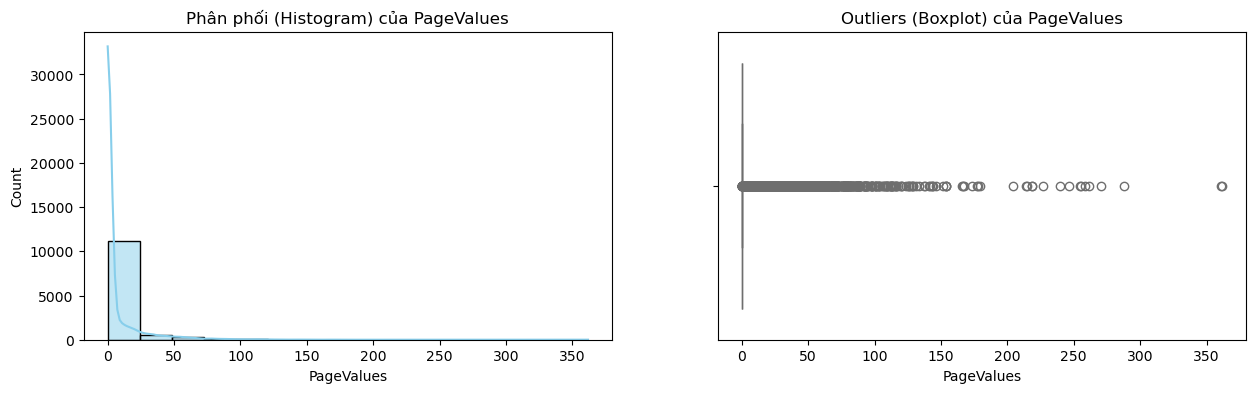

In [26]:
col = 'PageValues'
# Distribution & Central tendency
distri_num_col_info(col) 
# Range & Outliers
range_outliers_num_col_info(col)
float('inf')
# Data quality
data_quality_num_col_info(col, valid_range = (0,np.inf), suspicious_values = [-1, -9, -99, 99, 999, 9999] )
visualtion(col)

#### 9.2 Phân tích về thống kê cột Page Values
* **1. Phân phối và Xu hướng trung tâm:**
  * **Phân phối lạm phát số 0 (Zero-inflated):** Lệch phải cực kỳ nặng với đại đa số giá trị bằng 0. Điều này phản ánh thực tế rằng phần lớn các trang không đóng góp trực tiếp vào giá trị giao dịch.
  * **Mean > Median:** Mean (5.89) cao hơn hẳn so với Median (0.00) do bị kéo bởi các trang có giá trị chuyển đổi lớn.

* **2.Độ phân tán & Outliers:**
    * **Biến động tập trung:** Q1, Q3 và IQR đều bằng 0, cho thấy sự đồng nhất tuyệt đối ở nhóm trang không tạo ra giá trị.
    * **Dải Outliers** kéo dài từ >0 đến hơn 360.
* **3. Về Độ Phân Tán & Outliers (Range & Outliers)**
    * **Range**: Dữ liệu trải dài từ 0 đến khoảng 360. Khoảng biến thiên rất lớn.
    * **Bản chất ngoại lai:** Đây là dữ liệu thực (genuine values) và là "tín hiệu vàng". Những giá trị ngoại lai này đại diện cho các trang có tác động trực tiếp đến doanh thu.

* **Chất lượng dữ liệu (Data Quality)**
    *  Dữ liệu chất lượng cao cho mục đích phân loại. Mặc dù bị lệch nặng, nhưng sự khác biệt giữa giá trị 0 và lớn hơn 0 là yếu tố then chốt để dự đoán doanh thu.

#### 10.1 Thống kê cho cột Special Day


1. Xu hướng tập trung:
   - Mean (Trung bình): 0.06
   - Median (Trung vị): 0.00
   - Std Dev (Độ lệch chuẩn): 0.20
   - Skewness (Độ lệch): 3.29
	-> Phân phối dữ liệu: Lệch phải (Right Skewed)

2. Phạm vi & Outliers:
   - Min: 0.0 | Max: 1.0
   - Q1(25%): 0.0 | Q3(75%): 0.0 | IQR: 0.0
   - Lower Bound: 0.0 | Upper Bound: 0.0
   - Số lượng Outliers (IQR method): 1249 | Chiếm 10.23%

3. Chất lượng dữ liệu:
   - Impossible Values: 0
   - Placeholders Values: 0




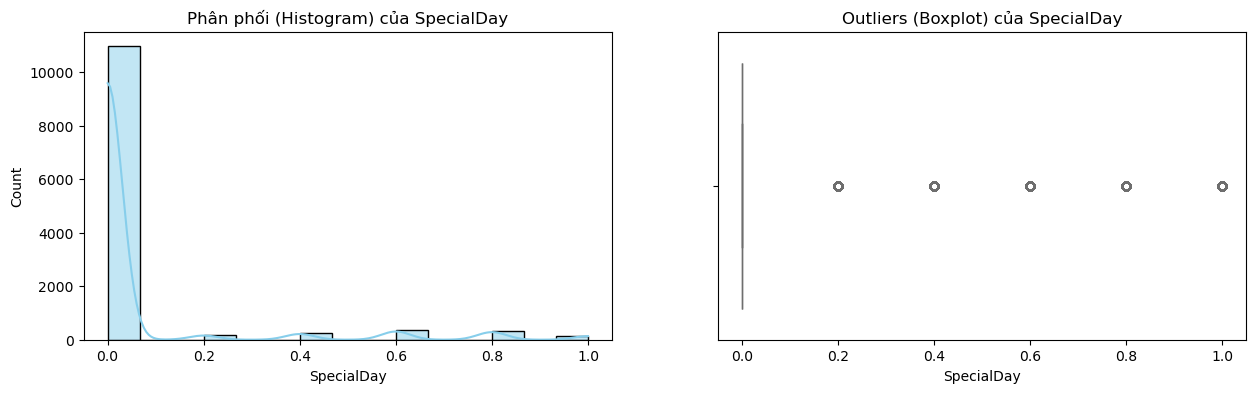

In [27]:
col = 'SpecialDay'
# Distribution & Central tendency
distri_num_col_info(col) 
# Range & Outliers
range_outliers_num_col_info(col)
float('inf')
# Data quality
data_quality_num_col_info(col, valid_range = (0,np.inf), suspicious_values = [-1, -9, -99, 99, 999, 9999] )
visualtion(col)

#### 10.2 Phân tích về thống kê cột Special Day
* **1. Phân phối & Xu hướng trung tâm:**
  * **Lệch phải & Rời rạc (Right-Skewed & Discrete):** Dữ liệu tập trung chủ yếu tại giá trị 0 (Mode & Median = 0), cho thấy đại đa số các phiên truy cập diễn ra vào ngày thường.
  * **Phân cụm:** Các cột dữ liệu xuất hiện theo từng nấc cụ thể (0.2, 0.4, 0.6, 0.8, 1.0) thay vì dải liên tục, biểu thị mức độ "gần" ngày lễ.
  * **Mean (0.06) > Median:** Giá trị trung bình bị kéo lên bởi các phiên truy cập trong các giai đoạn mua sắm cao điểm.

* **2. Về Độ Phân Tán & Outliers (Range & Outliers)**
    * **Biến động thấp ở nhóm đa số:**: IQR bằng 0 (Q1 = Q3 = 0), xác nhận hành vi truy cập ngày lễ là thiểu số trong bộ dữ liệu.
    * **Outliers (Giá trị ngoại lai)**: Các giá trị từ 0.2 đến 1.0 được coi là ngoại lai về mặt thống kê.
    * **Bản chất ngoại lai:** Là dữ liệu thực (genuine values), phản ánh yếu tố mùa vụ (seasonal factor). Những điểm này xuất hiện ít vì các dịp lễ chỉ chiếm tỷ lệ nhỏ thời gian trong năm.
* **Chất lượng dữ liệu (Data Quality)**
    * Dữ liệu sạch, nằm chuẩn trong biên độ [0, 1], không có giá trị phi lý cũng như không có placeholders.
    * Do tính chất tập trung tại các mốc cố định, biến này  có thể được xem xét như một biến phân loại (categorical) hoặc biến thứ bậc thay vì biến số liên tục để đạt hiệu quả tốt nhất trong mô hình.


#### 11. Tóm tắt dữ liệu sau phân tích
* **Chất lượng kỹ thuật tốt** 
    * **Không có dữ liệu rác (Garbage Data)**: Dữ liệu ghi nhận đúng thực tế logic và thời gian.
    *  **Tính nhất quán (Consistency)**: Các cột liên quan chặt chẽ với nhau, không xáy ra mẫu thuẫn.
    *  **Không có giá trị ảo/ Dữ liệu rỗng**
    *  **Định dạng dữ liệu chuẩn**: Các con số không bị nhầm lẫn ký tự lạ, trong quá trình chuyển về đúng kiểu dữ liệu không cần xử lý quá nhiều.
    * **Độ tin cậy cao**: 
* **Đặc điểm phân phối thống kê**
      * Lệch phải nặng (Right-Skewed)
      * **Zero Inflation**Số lượng giá trị 0 ở các cột rất lớn.
* **Ngoại lai thực tế (Genuine/ Natural Outliers)**: Số lượng giá trị 0 lớn. làm `upper low` và `lower low` đa số bằng nhau. Các cột giá trị lớn hơn 0 được xem là ngoại lai. Thực chất, không phải nhiễu (noise) mà là tín hiệu đại diện cho các nhóm hàng đặc biệt.

<div style="
    border-left: 4px solid #3498db;  /* Thanh đứng màu xanh dương */
    padding: 5px 10px;
    margin: 15px 0 10px 0;
    background-color: #f7fbff;       /* Nền màu xanh dương nhạt */
">
    <h3 style="color: #3498db; margin: 0;">
        IV. Về các cột Categorical
    </h3>
</div>

In [28]:

target_col = 'Revenue'

In [29]:
# Xác định các cột categorical
print("="*50)
print("CÁC CỘT CATEGORICAL:")
print("="*50)
print(f"Tổng số cột categorical: {len(categorical_cols)}")
print(f"Tên các cột: {categorical_cols}\n")

CÁC CỘT CATEGORICAL:
Tổng số cột categorical: 8
Tên các cột: ['Month', 'OperatingSystems', 'Browser', 'Region', 'TrafficType', 'VisitorType', 'Weekend', 'Revenue']



In [30]:
print("="*50)
print("PHÂN PHỐI GIÁ TRỊ CÁC CỘT CATEGORICAL")
print("="*50)

for col in categorical_cols:
    print(f"- Cột: {col}")
    
    # 1. Kiểm tra số lượng giá trị
    n_unique = data[col].nunique(dropna=False) # Đếm cả NaN là 1 loại giá trị
    print(f"    + Số lượng giá trị khác nhau (Unique): {n_unique}")
    
    value_counts = data[col].value_counts(dropna=False)
    
    # 2. Xử lý trường hợp cột vô dụng (Chỉ có 1 giá trị)
    if n_unique <= 1:
        print(f"    -> CẢNH BÁO: Cột này chỉ có 1 giá trị duy nhất (hoặc toàn null) -> Bỏ")
        print("-" * 30)
        continue # Bỏ qua, sang cột tiếp theo

    # 3. In top giá trị
    print(f"    + Top 10 giá trị xuất hiện nhiều nhất:")
    print(value_counts.head(10))
    
    # 4. Kiểm tra cân bằng
    most_freq = value_counts.iloc[0]
    least_freq = value_counts.iloc[-1]
    
    # Xử lý chia cho 0 an toàn
    if least_freq == 0:
        ratio = float('inf')
        print(f"    + Tần suất cao nhất: {most_freq} | Thấp nhất: 0")
        print(f"    -> LỖI: Có category xuất hiện 0 lần (dữ liệu bị thiếu class).")
    else:
        ratio = most_freq / least_freq
        print(f"    + Tần suất cao nhất: {most_freq} | Tần suất thấp nhất: {least_freq}")
        print(f"    + Tỷ lệ cân bằng: {ratio:.2f}:1")
        
        if ratio > 10:
            print(f"    -> Phân phối rất lệch (Highly Imbalanced)")
        elif ratio > 3:
            print(f"    -> Phân phối lệch (Imbalanced)")
        else:
            print(f"    -> Phân phối cân bằng (Balanced)")
            
    print("-" * 30) # Kẻ dòng cho dễ nhìn giữa các cột

PHÂN PHỐI GIÁ TRỊ CÁC CỘT CATEGORICAL
- Cột: Month
    + Số lượng giá trị khác nhau (Unique): 10
    + Top 10 giá trị xuất hiện nhiều nhất:
Month
May     3329
Nov     2982
Mar     1860
Dec     1706
Oct      549
Sep      448
Aug      433
Jul      432
June     285
Feb      181
Name: count, dtype: int64
    + Tần suất cao nhất: 3329 | Thấp nhất: 0
    -> LỖI: Có category xuất hiện 0 lần (dữ liệu bị thiếu class).
------------------------------
- Cột: OperatingSystems
    + Số lượng giá trị khác nhau (Unique): 8
    + Top 10 giá trị xuất hiện nhiều nhất:
OperatingSystems
2    6541
1    2549
3    2530
4     478
8      75
6      19
7       7
5       6
Name: count, dtype: int64
    + Tần suất cao nhất: 6541 | Tần suất thấp nhất: 6
    + Tỷ lệ cân bằng: 1090.17:1
    -> Phân phối rất lệch (Highly Imbalanced)
------------------------------
- Cột: Browser
    + Số lượng giá trị khác nhau (Unique): 13
    + Top 10 giá trị xuất hiện nhiều nhất:
Browser
2     7883
1     2427
4      731
5      465
6 

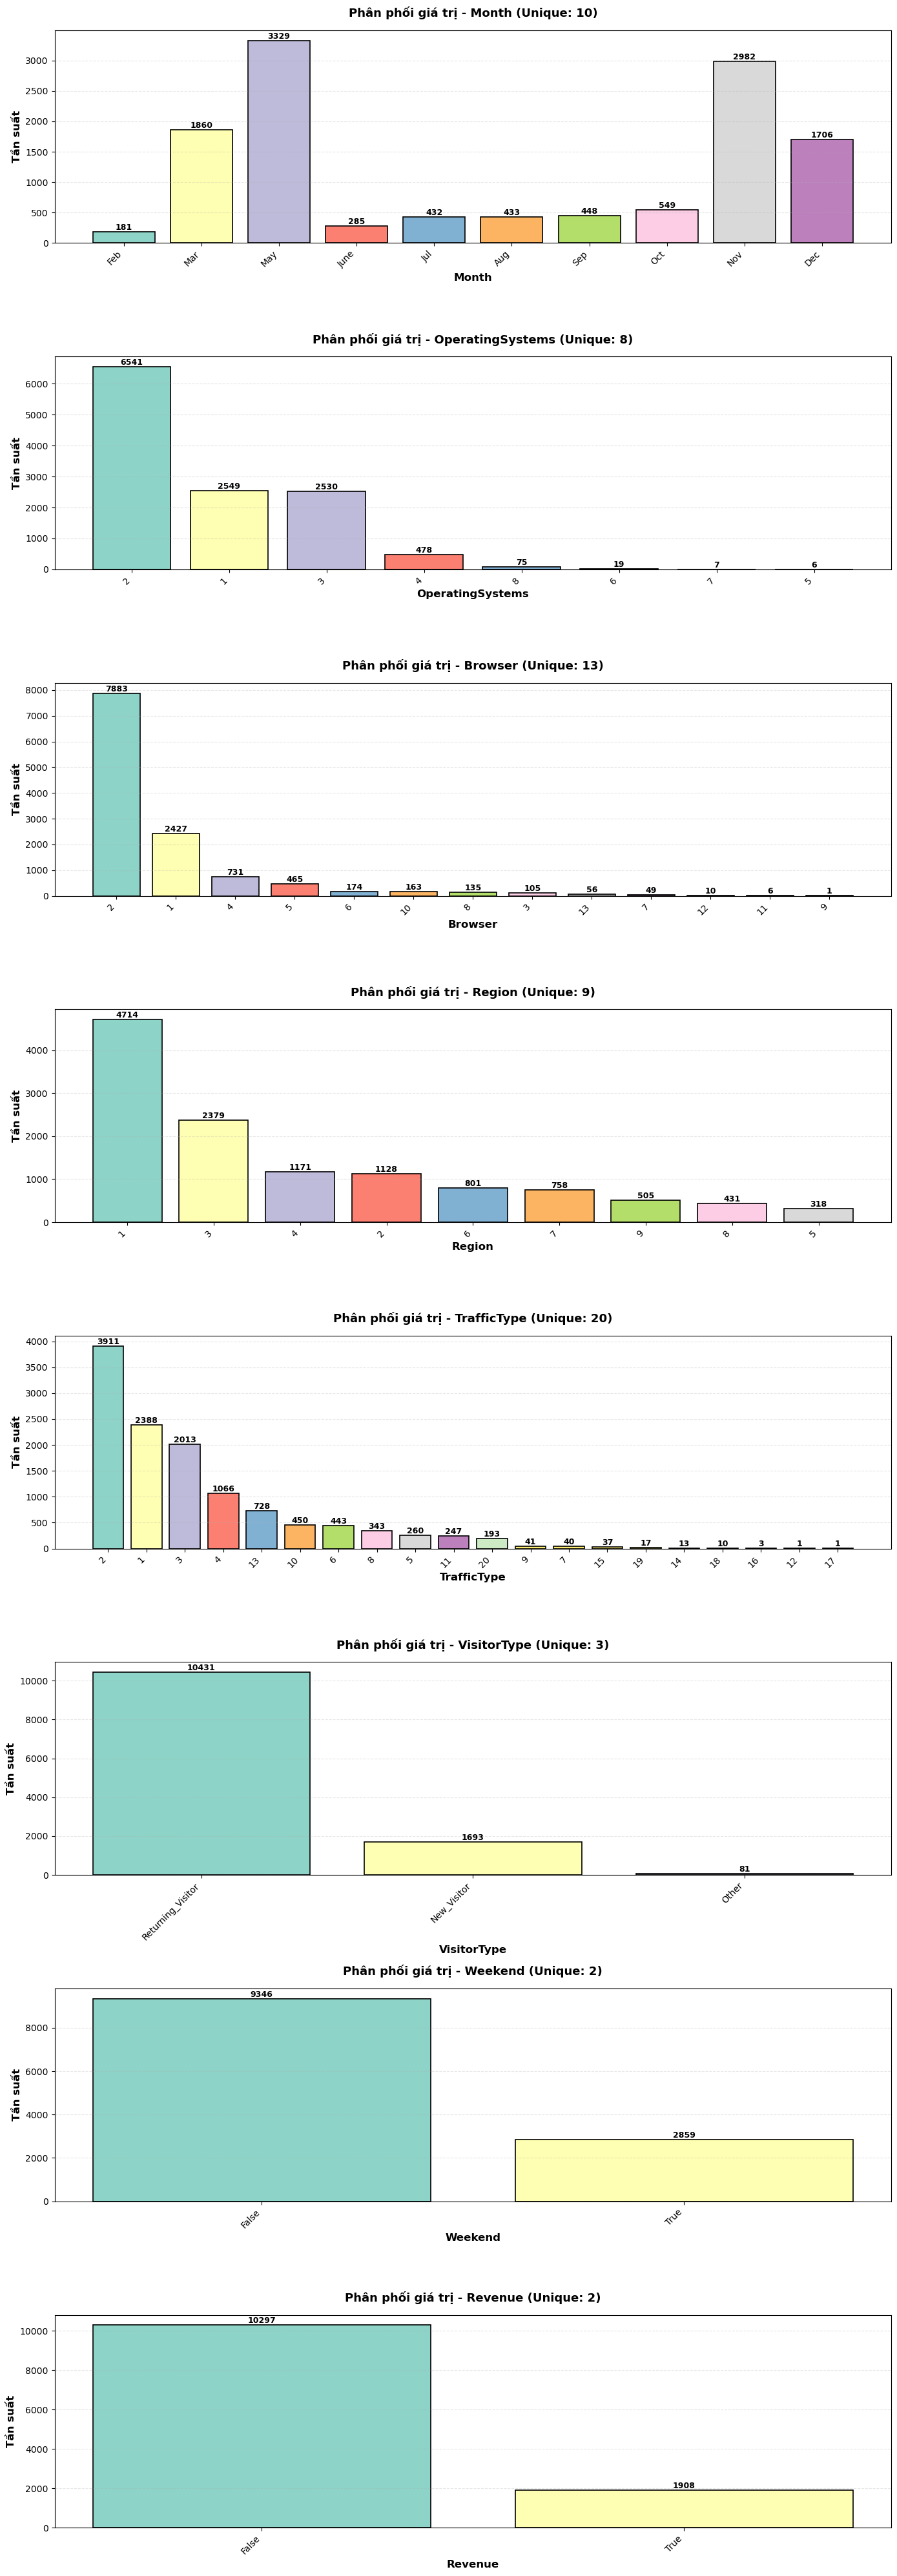

In [31]:
fig, axes = plt.subplots(len(categorical_cols), 1, figsize=(14, 5*len(categorical_cols)))

# Nếu chỉ có 1 cột thì axes không phải là mảng, cần chuyển thành mảng để vòng lặp chạy đúng
if len(categorical_cols) == 1:
    axes = [axes]

for idx, col in enumerate(categorical_cols):
    ax = axes[idx]
    
    # Tính toán value_counts
    value_counts = data[col].value_counts(dropna=False)
    # Cột Month theo thứ tự thời gian
    if col == 'Month':
        # Định nghĩa thứ tự đúng 
        month_order = ['Feb', 'Mar', 'May', 'June', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
        # Chỉ lấy những tháng thực sự xuất hiện trong dữ liệu để tránh lỗi
        existing_months = [m for m in month_order if m in value_counts.index]
        value_counts = value_counts.reindex(existing_months)

    # Tạo màu sắc
    colors = plt.cm.Set3(range(len(value_counts)))
    
    # Vẽ biểu đồ
    bars = ax.bar(range(len(value_counts)), value_counts.values, color=colors, edgecolor='black', linewidth=1.2)
    
    # Thiết lập trục X
    ax.set_xticks(range(len(value_counts)))
    ax.set_xticklabels(value_counts.index, rotation=45, ha='right', fontsize=10)
    
    # Trang trí
    ax.set_xlabel(f'{col}', fontsize=12, fontweight='bold')
    ax.set_ylabel('Tần suất', fontsize=12, fontweight='bold')
    ax.set_title(f'Phân phối giá trị - {col} (Unique: {data[col].nunique()})', fontsize=13, fontweight='bold', pad=15)
    ax.grid(axis='y', alpha=0.3, linestyle='--')
    
    # Thêm nhãn giá trị lên từng cột
    for bar in bars:
        height = bar.get_height()
        ax.text(bar.get_x() + bar.get_width()/2., height,
                f'{int(height)}',
                ha='center', va='bottom', fontsize=9, fontweight='bold')

plt.tight_layout()
plt.show()

#### 1. Tổng quan về tập dữ liệu
* **Đặc điểm chính:** Hầu hết các đặc trưng (features) đều có sự phân phối **lệch (skewed)**, dữ liệu không đồng đều giữa các nhóm.

---

#### 2. Phân tích chi tiết từng đặc trưng
##### Thời gian (Month & Weekend)
* **Month (Tháng):**
    * **Cao điểm:** Tháng 5 (`May`) và tháng 11 (`Nov`). Có thể liên quan đến các đợt khuyến mãi hoặc sự kiện theo mùa.
    * **Thấp điểm:** Tháng 2 (`Feb`).
    * **Lưu ý:** Dữ liệu chỉ có 10 tháng (Unique: 10), thiếu tháng 1 và tháng 4.
* **Weekend (Cuối tuần):**
    * Lượng truy cập vào **Ngày thường (False)** cao gấp **3 lần** so với **Cuối tuần (True)**.
    * -> **Insight:** Website có thể phục vụ cho công việc (B2B), tin tức tài chính hoặc công cụ học tập.

##### Công nghệ 
* **OS:** `Label 2` chiếm ưu thế vượt trội (> 6000), theo sau là `1`.
* **Browser:** `Label 2` chiếm thị phần áp đảo (gần 8000).
* -> **Insight:** Người dùng có xu hướng sử dụng công nghệ tập trung, ít đa dạng. Cần tối ưu giao diện (UI/UX) cho các nền tảng phổ biến này trước.

##### Hành vi người dùng
* **VisitorType:**
    * **Returning_Visitor (Khách quay lại):** 10,431 (Chiếm đa số).
    * **New_Visitor (Khách mới):** 1,693.
    * -> **Insight:** Tỷ lệ giữ chân khách hàng (Retention) rất tốt. Tuy nhiên, việc thu hút khách hàng mới (Acquisition) đang thấp.
* **TrafficType:**
    * Phân phối dạng đuôi dài (Long tail). `Type 2` cao nhất, các loại nguồn khác giảm dần.

* **Region:**
    * `Region 1` đóng góp lượng truy cập lớn nhất (gần 5000).

---

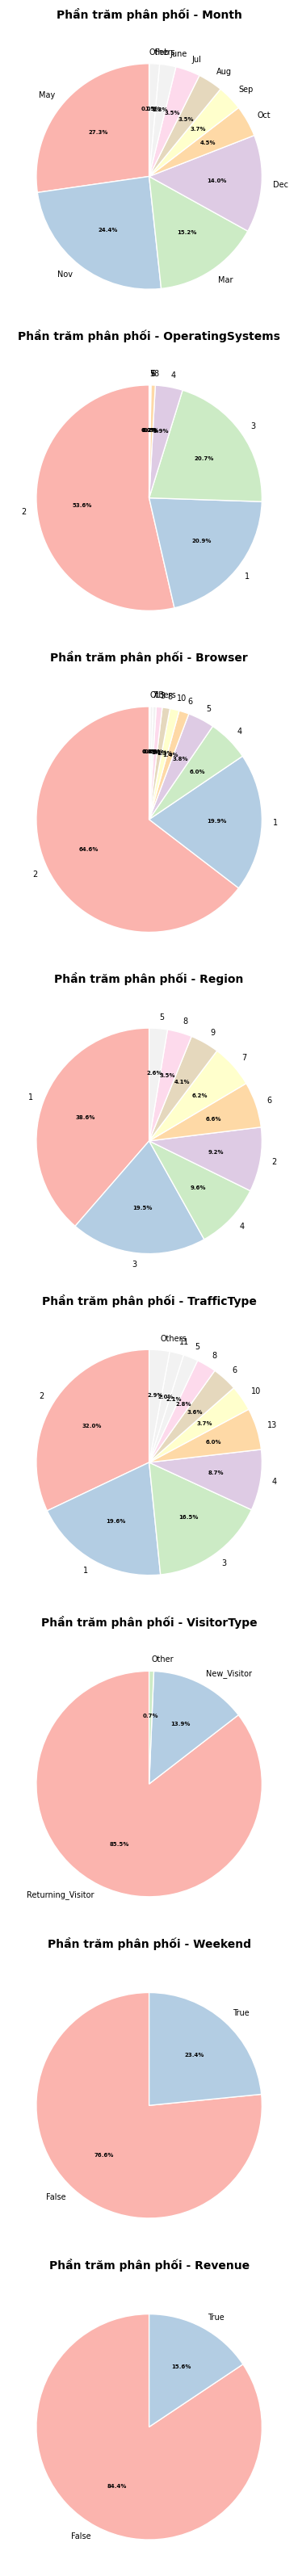

In [32]:
fig, axes = plt.subplots(len(categorical_cols), 1, figsize=(12, 4*len(categorical_cols)))

for idx, col in enumerate(categorical_cols):
    ax = axes[idx]
    
    # Lấy top 10 categories (nếu nhiều hơn sẽ ghép "Others")
    value_counts = data[col].value_counts(dropna=False)
    if len(value_counts) > 10:
        top_10 = value_counts.head(10)
        others = value_counts.iloc[10:].sum()
        top_10['Others'] = others
        value_counts = top_10
    
    colors = plt.cm.Pastel1(range(len(value_counts)))
    wedges, texts, autotexts = ax.pie(value_counts.values, 
                                        labels=value_counts.index, 
                                        autopct='%1.1f%%',
                                        colors=colors,
                                        startangle=90,
                                        textprops={'fontsize': 7},
                                        wedgeprops={'linewidth': 1, 'edgecolor': 'white'})
    
    for autotext in autotexts:
        autotext.set_color('black')
        autotext.set_fontweight('bold')
        autotext.set_fontsize(5)
    
    ax.set_title(f'Phần trăm phân phối - {col}', fontsize=10, fontweight='bold', pad=15)

plt.tight_layout()
plt.show()

Biểu đồ tròn làm nổi bật **cơ cấu phần trăm** và sự chênh lệch giữa các nhóm.

---

#### Phân tích Chi tiết Tỷ trọng

##### Yếu tố Thời gian
* **Month (Tháng):**
    * **Sự tập trung cao độ:** Top 4 tháng dẫn đầu (`May`, `Nov`, `Mar`, `Dec`) chiếm khoảng **81%** tổng dữ liệu.
    * **Tháng 5 (May):** Chiếm thị phần lớn nhất (**27.3%**).
    * **Các tháng còn lại:** Chiếm tỷ trọng rất nhỏ (1-3%), cho thấy tính thời vụ mạnh mẽ.
* **Weekend (Cuối tuần):**
    * **Ngày thường (76.7%)** áp đảo so với **Cuối tuần (23.3%)**.
    * -> **Kết luận:** Website chủ yếu được truy cập vào giờ hành chính/ngày làm việc.

##### Hành vi Khách hàng 
* **VisitorType (Loại khách):**
    * **Returning Visitor:** Chiếm **85.6%** (Rất cao).
    * **New Visitor:** Chỉ chiếm **13.7%**.
    * -> **Insight:** Website có khả năng giữ chân khách hàng tốt, nhưng khả năng thu hút khách mới đang yếu.

##### Hạ tầng và Công nghệ
* **OperatingSystems (OS):**
    * `OS 2` chiếm quá bán (**53.5%**).
    * Top 3 OS (`2`, `1`, `3`) cộng lại chiếm tới **95%**.
* **Browser:**
    * `Browser 2` chiếm thế độc tôn (**64.6%**).
    * Các trình duyệt còn lại bị phân mảnh mạnh (đuôi dài).

##### Khu vực và Nguồn truy cập
* **Region:** Phân phối đều hơn các đặc trưng khác, nhưng `Region 1` vẫn lớn nhất (**38.8%**).
* **TrafficType:** `Type 2` dẫn đầu (**31.7%**).

---

In [33]:
print("="*50)
print("BẢNG TÓM TẮT CHẤT LƯỢNG DỮ LIỆU CATEGORICAL")
print("="*50)

summary_data = []
for col in categorical_cols:
    n_unique = data[col].nunique()
    missing_count = data[col].isna().sum()
    missing_ratio = (missing_count / len(data)) * 100
    value_counts = data[col].value_counts(dropna=False)
    most_freq_value = value_counts.index[0]
    most_freq_count = value_counts.iloc[0]
    most_freq_ratio = (most_freq_count / len(data)) * 100
    
    summary_data.append({
        'Cột': col,
        'Số Unique': n_unique,
        'Missing (%)': f'{missing_ratio:.2f}%',
        'Giá trị phổ biến nhất': most_freq_value,
        'Tần suất (%)': f'{most_freq_ratio:.2f}%'
    })

summary_df = pd.DataFrame(summary_data)
print(summary_df.to_string(index=False))

BẢNG TÓM TẮT CHẤT LƯỢNG DỮ LIỆU CATEGORICAL
             Cột  Số Unique Missing (%) Giá trị phổ biến nhất Tần suất (%)
           Month         10       0.00%                   May       27.28%
OperatingSystems          8       0.00%                     2       53.59%
         Browser         13       0.00%                     2       64.59%
          Region          9       0.00%                     1       38.62%
     TrafficType         20       0.00%                     2       32.04%
     VisitorType          3       0.00%     Returning_Visitor       85.46%
         Weekend          2       0.00%                 False       76.58%
         Revenue          2       0.00%                 False       84.37%


___
#### Đánh giá Bảng Tóm tắt Chất lượng Dữ liệu

##### 1. Tính Toàn vẹn của Dữ liệu:
* **Không có giá trị khuyết (Missing Values):** Tất cả các cột đều có tỉ lệ Missing là **0.00%**.
* **Kết luận:** Dữ liệu rất sạch về mặt kỹ thuật, bạn không cần thực hiện các bước xử lý điền khuyết.

##### 2. Phân tích Độ đa dạng
* **Biến có độ đa dạng cao:** `TrafficType` (20 giá trị) và `Browser` (13 giá trị).
    * *Lưu ý:* Khi mã hóa (encoding) các biến này, cần thận trọng nếu dùng One-Hot Encoding vì sẽ tạo ra quá nhiều cột mới.
* **Biến có độ đa dạng thấp:** `VisitorType` (3), `Weekend` (2). Các biến này thích hợp làm biến phân loại chính hoặc đích dự đoán.
* **Vấn đề về thời gian:** Cột `Month` chỉ có **10** giá trị unique. Một năm có 12 tháng -> **Dữ liệu bị thiếu 2 tháng**.

##### 3. Mất cân bằng dữ liệu
Hầu hết các biến đều bị lệch (skewed), tức là một giá trị chiếm ưu thế áp đảo:

| Cột | Giá trị phổ biến nhất | Tỷ lệ chiếm (%) | Nhận xét |
| :--- | :---: | :---: | :--- |
| **VisitorType** | Returning_Visitor | **85.57%** | **Rất lệch.** Mô hình sẽ có xu hướng học thiên vị theo nhóm khách quay lại. Cần kỹ thuật xử lý (Resampling/Class Weight). |
| **Weekend** | False | **76.74%** | Phản ánh đúng thực tế (5 ngày thường vs 2 ngày cuối tuần). |
| **Browser** | 2 | **64.57%** | Người dùng tập trung vào một trình duyệt cụ thể. |
| **OperatingSystems** | 2 | **53.54%** | Hệ điều hành cũng tương tự Browser. |

In [34]:
print("="*50)
print("KIỂM TRA SỰ KHÔNG NHẤT QUÁN VÀ GIÁ TRỊ BẤT THƯỜNG")
print("="*50)

for col in categorical_cols:
    print(f"- Cột: {col}")
    value_counts = data[col].value_counts(dropna=False)
    
    # Kiểm tra khoảng trắng hoặc dữ liệu trống
    unique_vals = data[col].unique()
    whitespace_vals = [v for v in unique_vals if isinstance(v, str) and v.strip() != v]
    if whitespace_vals:
        print(f"  Phát hiện khoảng trắng ở đầu/cuối: {whitespace_vals}")
    
    # Kiểm tra giá trị hiếm (< 5 quan sát)
    rare_vals = value_counts[value_counts < 5]
    if len(rare_vals) > 0:
        print(f"  Giá trị hiếm (< 5 quan sát): {len(rare_vals)} giá trị")
        print(f"     Chi tiết: {rare_vals.to_dict()}")
    
    # Kiểm tra các giá trị có vẻ là missing indicator
    suspect_vals = [v for v in unique_vals if isinstance(v, str) and v.lower() in ['unknown', 'na', 'n/a', 'nan', 'null', 'none', '?']]
    if suspect_vals:
        print(f"  Giá trị nghi ngờ là missing: {suspect_vals}")
    
    if not whitespace_vals and len(rare_vals) == 0 and not suspect_vals:
        print(f"  Không phát hiện vấn đề")

KIỂM TRA SỰ KHÔNG NHẤT QUÁN VÀ GIÁ TRỊ BẤT THƯỜNG
- Cột: Month
  Giá trị hiếm (< 5 quan sát): 2 giá trị
     Chi tiết: {'Jan': 0, 'Apr': 0}
- Cột: OperatingSystems
  Không phát hiện vấn đề
- Cột: Browser
  Giá trị hiếm (< 5 quan sát): 1 giá trị
     Chi tiết: {9: 1}
- Cột: Region
  Không phát hiện vấn đề
- Cột: TrafficType
  Giá trị hiếm (< 5 quan sát): 3 giá trị
     Chi tiết: {16: 3, 12: 1, 17: 1}
- Cột: VisitorType
  Không phát hiện vấn đề
- Cột: Weekend
  Không phát hiện vấn đề
- Cột: Revenue
  Không phát hiện vấn đề


___
#### Đánh giá Tính Nhất quán và Giá trị Bất thường

Báo cáo này tập trung vào việc phát hiện các giá trị xuất hiện quá ít (Rare Labels) trong các biến phân loại. Dưới đây là các điểm cần lưu ý:

##### 1. Tình trạng chung 
* **Độ sạch cao:** 5/7 cột dữ liệu (`Month`, `OS`, `Region`, `VisitorType`, `Weekend`) hoàn toàn "sạch", không chứa giá trị lạ hay lỗi đánh máy.
* **Tính nhất quán:** Các nhãn dữ liệu tuân thủ đúng định dạng (không có trường hợp như "May" và "may" lẫn lộn).

##### 2. Các vấn đề phát hiện

Một số giá trị xuất hiện với tần suất cực thấp (dưới 5 lần). Trong Khoa học dữ liệu, đây thường được coi là **nhiễu (noise)** hơn là tín hiệu có giá trị.

| Cột (Feature) | Giá trị (Label) | Số lần xuất hiện (Count) | Tác động tiềm ẩn |
| :--- | :---: | :---: | :--- |
| **Browser** | `9` | **1** | Có thể là một trình duyệt thử nghiệm hoặc bot hiếm gặp. |
| **TrafficType** | `12`, `17` | **1** | Nguồn lưu lượng không xác định hoặc lỗi log. |
| **TrafficType** | `16` | **3** | Quá ít để mô hình học được quy luật. |

##### 3. Rủi ro khi mô hình hóa

Nếu giữ nguyên các giá trị hiếm này, bạn sẽ gặp các rủi ro sau:
1.  **Lỗi chia tập Train/Test:** Khi dùng `Stratified K-Fold` hoặc `train_test_split`, nếu một nhãn chỉ có 1 giá trị, nó sẽ chỉ nằm ở Train hoặc Test, gây lỗi kỹ thuật hoặc khiến mô hình gặp nhãn lạ (Unseen Label) khi dự báo.
2.  **Overfitting:** Các mô hình cây quyết định (Decision Tree) có thể cố gắng tạo ra một nhánh riêng chỉ để dự đoán cho 1 sample này, dẫn đến học vẹt.
___

<div style="
    border-left: 4px solid #3498db;  /* Thanh đứng màu xanh dương */
    padding: 5px 10px;
    margin: 15px 0 10px 0;
    background-color: #f7fbff;       /* Nền màu xanh dương nhạt */
">
    <h3 style="color: #3498db; margin: 0;">
        V. Giá trị thiếu
    </h3>
</div>

<div style="
  margin: 16px 0;
  padding: 10px 16px;
  border: 1px solid #fde68a;
  border-radius: 10px;
  background-color: #fffbeb;
  display: inline-block;
">
  <span style="font-weight: 500;">
    Qua kiểm tra các thuộc tính categorical và numerical, không có thuộc tính nào có giá trị thiếu.
  </span>
</div>


<div style="
    border-left: 4px solid #3498db;  /* Thanh đứng màu xanh dương */
    padding: 5px 10px;
    margin: 15px 0 10px 0;
    background-color: #f7fbff;       /* Nền màu xanh dương nhạt */
">
    <h3 style="color: #3498db; margin: 0;">
        VI. Mối quan hệ và tương quan
    </h3>
</div>

<div style="
  margin: 18px 0 12px 0;
  padding: 6px 14px;
  border: 1px solid #dbeafe;
  border-radius: 8px;
  background-color: #f8fbff;
  display: inline-block;
">
  <h4 style="
    margin: 0;
    font-weight: 600;
  ">
    Numerical x Numerical
  </h4>
</div>


Sử dụng hàm `corr` của `pandas` tính toán hệ số tương quan `pearson` lưu vào biến ma trận `corr_matrix`

In [35]:
num_cols = [
    'Administrative', 'Administrative_Duration',
    'Informational', 'Informational_Duration',
    'ProductRelated', 'ProductRelated_Duration',
    'BounceRates', 'ExitRates', 'PageValues',
    'SpecialDay'
]
corr_matrix = data[num_cols].corr(method='pearson')
corr_matrix

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay
Administrative,1.000000,0.600457,0.375256,0.254813,0.428305,0.371146,-0.213096,-0.311255,0.097017,-0.096951
Administrative_Duration,0.600457,1.000000,0.301419,0.237211,0.286863,0.353583,-0.136913,-0.201971,0.066228,-0.074666
Informational,0.375256,0.301419,1.000000,0.618648,0.372572,0.386052,-0.109095,-0.159429,0.047406,-0.049350
Informational_Duration,0.254813,0.237211,0.618648,1.000000,0.279082,0.346596,-0.069878,-0.102852,0.030090,-0.031261
ProductRelated,0.428305,0.286863,0.372572,0.279082,1.000000,0.860330,-0.192884,-0.286082,0.054201,-0.025839
ProductRelated_Duration,0.371146,0.353583,0.386052,0.346596,0.860330,1.000000,-0.173829,-0.245265,0.050923,-0.038122
BounceRates,-0.213096,-0.136913,-0.109095,-0.069878,-0.192884,-0.173829,1.000000,0.902144,-0.115799,0.088626
ExitRates,-0.311255,-0.201971,-0.159429,-0.102852,-0.286082,-0.245265,0.902144,1.000000,-0.173627,0.117176
PageValues,0.097017,0.066228,0.047406,0.030090,0.054201,0.050923,-0.115799,-0.173627,1.000000,-0.064481
SpecialDay,-0.096951,-0.074666,-0.049350,-0.031261,-0.025839,-0.038122,0.088626,0.117176,-0.064481,1.000000


Xây dựng biểu đồ nhiệt (heatmap) tương quan để trực quan hóa các mối quan hệ bằng `heatmap` của thư viện `seasborn`

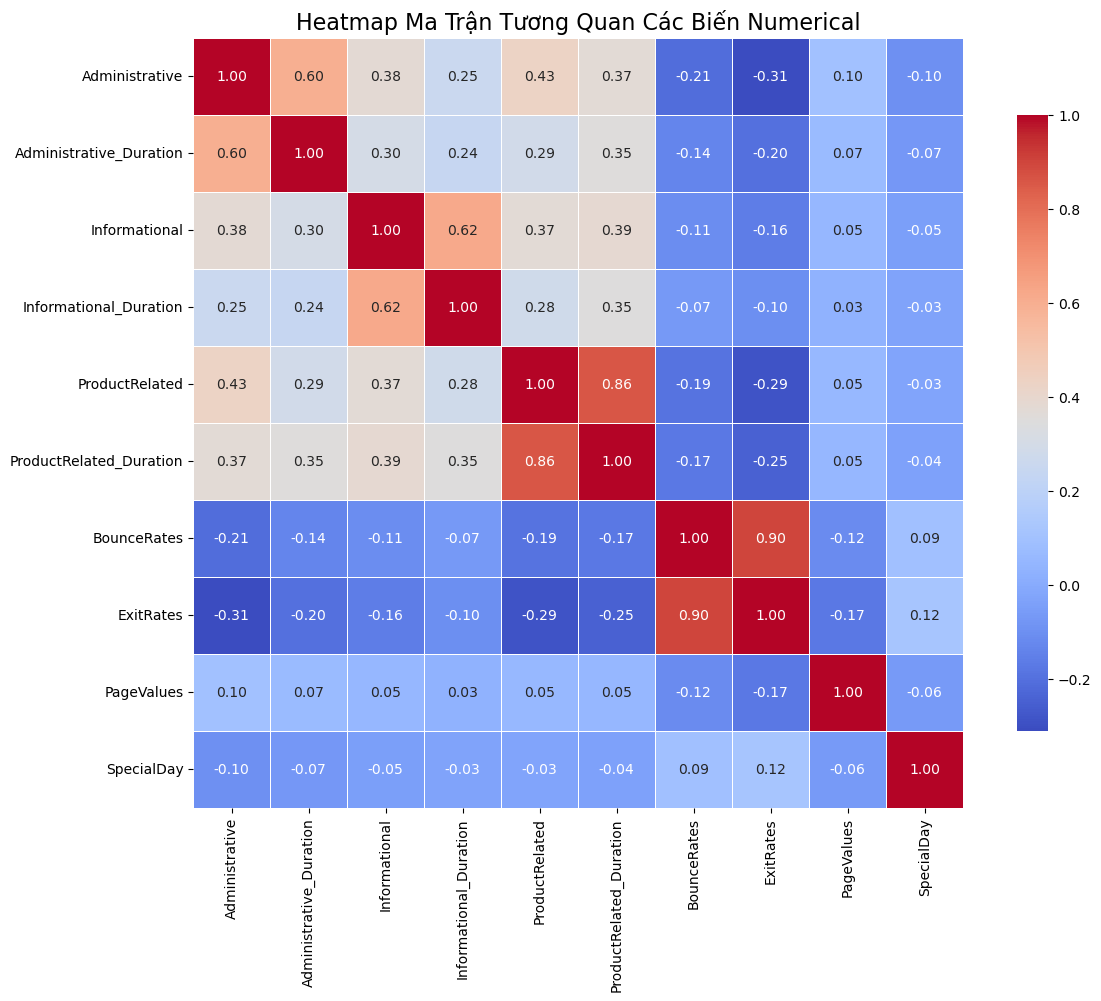

In [36]:
plt.figure(figsize=(14, 10))

sns.heatmap(
    corr_matrix,
    annot=True,            # hiển thị giá trị tương quan
    fmt=".2f",             # format số
    linewidths=0.5,         # đường phân cách các ô
    cmap="coolwarm",        # bảng màu dễ đọc
    square=True,            # ô vuông
    cbar_kws={"shrink": 0.8}  # thu nhỏ colorbar
)

plt.title("Heatmap Ma Trận Tương Quan Các Biến Numerical", fontsize=16)
plt.show()

<div style="margin: 14px 0 8px 0;">
  <h5 style="margin: 0; font-weight: 500;">
    ▸ Nhận xét về các mối quan hệ tương quan mạnh quan sát được
  </h5>
</div>

- Các cặp biến tương quan mạnh:
    - `Administrative` và `Administrative_Duration`
    - `Informational` và `Informational_Duration`
    - `ProductRelated` và `ProductRelated_Duration`
    - `BounceRates` và `ExitRates`
- 3 cặp biến về số trang xem và thời gian xem của loại trang đó (`Administrative` và `Administrative_Duration`, `Informational` và `Informational_Duration`, `ProductRelated` và `ProductRelated_Duration`) có tương quan mạnh vì trong cùng một phiên truy cập, số trang được xem càng nhiều thì tổng thời gian dành cho loại trang đó càng tăng. Đặc biệt, `ProductRelated` và `ProductRelated_Duration`có mối tương quan rất mạnh với hệ số tương quan xấp xỉ 0.86
- Hai biến `BounceRates` và `ExitRates` thể hiện mối tương quan rất mạnh vì cả hai đều mô tả hành vi người dùng rời khỏi phiên truy cập, mặc dù mỗi biến đo lường theo một góc độ khác nhau. Một trang có tỷ lệ bounce cao thường cũng là trang mà tỉ lệ người dùng rời phiên cao, khiến cả hai chỉ số tăng đồng thời.

<div style="
  margin: 18px 0 12px 0;
  padding: 6px 14px;
  border: 1px solid #dbeafe;
  border-radius: 8px;
  background-color: #f8fbff;
  display: inline-block;
">
  <h4 style="
    margin: 0;
    font-weight: 600;
  ">
    Categorical x Categorical
  </h4>
</div>


Ở phần này, các cặp biến categorical quan trọng được thể hiện tương quan bằng bảng tần số, trực quan hóa bằng heatmap.

Các cặp biến được chọn:

* **Tất cả các cột khác $\times$ `Revenue`**
    * Xác định tỷ lệ chuyển đổi (`Revenue`) giữa các giá trị khác nhau của các thuộc tính phân loại.

* **`VisitorType` $\times$ `TrafficType`**
    * Phân tích Tương tác Kênh & Phân khúc: Kênh traffic nào thu hút Khách hàng Mới hiệu quả nhất và kênh nào giữ chân Khách hàng Quay lại.

* **`Month` $\times$ `VisitorType`**
    * Phân tích Thay đổi Khán giả theo Thời gian: Quan sát xem tỷ lệ Khách hàng Mới và Khách hàng Quay lại có biến động như thế nào giữa các tháng, giúp điều chỉnh mục tiêu tiếp thị theo mùa.


<div style="margin: 14px 0 8px 0;">
  <h5 style="margin: 0; font-weight: 500;">
    ▸ Tỉ lệ chuyển đổi của các biến Categorical
  </h5>
</div>

In [37]:
print("="*80)
print("BẢNG TỶ LỆ CHUYỂN ĐỔI")
print("="*80)

examine_cols = categorical_cols[:-1]

for col in examine_cols:
    print(f"\n{'='*20} {col.upper()} {'='*20}")
    
    # 1. Tính Tỷ lệ chuyển đổi (%) 
    rates = pd.crosstab(data[col], data['Revenue'], normalize='index') * 100
    rates.rename(columns={True: 'Conversion (%)', False: 'No Buy (%)'}, inplace=True)
    
    # 2. Tính Tổng số lượng thực tế (Total Count)
    counts = data[col].value_counts()
    counts.name = 'Total Count'
    
    # 3. Gộp lại
    result = pd.concat([counts, rates], axis=1)
    
    # 4. Sắp xếp & Chọn cột 
    final_table = result[['Total Count', 'Conversion (%)']].sort_values(
        by='Total Count', 
        ascending=False
    )
    
    # 5. Hiển thị bảng
    print(final_table)
    print("\n")

BẢNG TỶ LỆ CHUYỂN ĐỔI

==================== MONTH ====================
       Total Count  Conversion (%)
Month                             
May           3329       10.964254
Nov           2982       25.486251
Mar           1860       10.322581
Dec           1706       12.661196
Oct            549       20.947177
Sep            448       19.196429
Aug            433       17.551963
Jul            432       15.277778
June           285       10.175439
Feb            181        1.657459
Jan              0             NaN
Apr              0             NaN



==================== OPERATINGSYSTEMS ====================
                  Total Count  Conversion (%)
OperatingSystems                             
2                        6541       17.657850
1                        2549       14.868576
3                        2530       10.592885
4                         478       17.782427
8                          75       22.666667
6                          19       10.526316
7        

<div style="margin: 14px 0 8px 0;">
  <h5 style="margin: 0; font-weight: 500;">
    ▸ Mối quan hệ giữa các biến Categorical đặc biệt
  </h5>
</div>

Hàm `freq_table` để tính cross tabulations giữa 2 biến categorical và biểu diễn trực quan bằng heatmap

In [38]:
def freq_table(df, col1, col2, plot_heatmap=False):
    table = pd.crosstab(df[col1], df[col2])
    if plot_heatmap:
        plt.figure(figsize=(12,6))
        sns.heatmap(table, annot=True, fmt='d', linewidths=.5)
        plt.title(f"Heatmap: {col1} {col2}")
        plt.show()
    return table

Xét mối quan hệ giữa `VisitorType` với `Month` và `TrafficType`


Frequency Table: VisitorType and Month


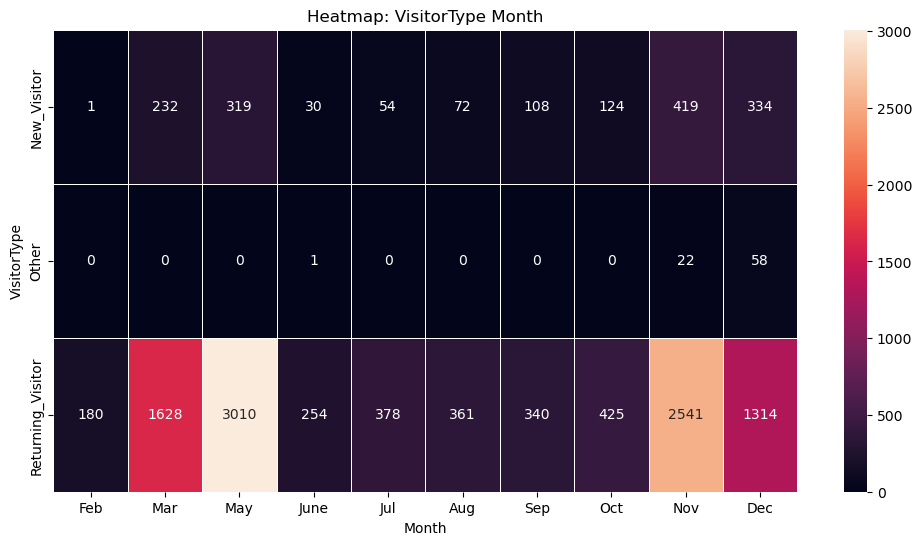


Frequency Table: VisitorType and TrafficType


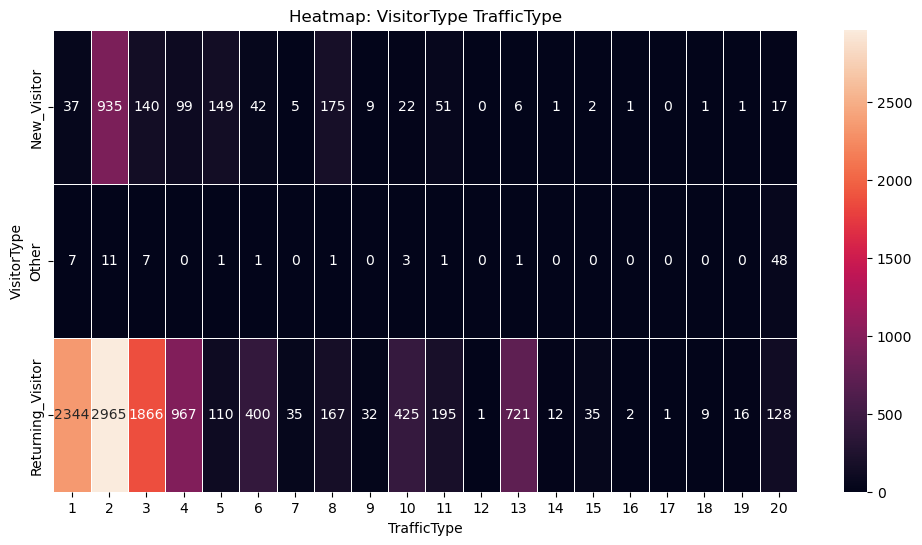

In [39]:
important_pairs = [
    ('VisitorType', 'Month'),
    ('VisitorType', 'TrafficType'),
]

# Tạo bảng tần suất + heatmap cho từng cặp
results = {}

for col1, col2 in important_pairs:
    print(f"\nFrequency Table: {col1} and {col2}")
    table = freq_table(data, col1, col2, plot_heatmap=True)
    results[f"{col1}_{col2}"] = table

<div style="margin: 14px 0 8px 0;">
  <h5 style="margin: 0; font-weight: 500;">
    ▸ Nhận xét
  </h5>
</div>

**Về tỉ lệ chuyển đổi:**
- **`VisitorType`**
  - `New_Visitor` có tỷ lệ chuyển đổi cao hơn `Returning_Visitor`.
  - `Returning_Visitor` chiếm phần lớn số lượng người dùng (10,431) nhưng tỷ lệ chuyển đổi chỉ đạt 14.09%.
  - `New_Visitor` có quy mô nhỏ hơn (1,693) nhưng đạt tỷ lệ chuyển đổi 24.93%.
  - Dữ liệu cho thấy sự khác biệt rõ rệt về hiệu suất chuyển đổi giữa hai nhóm, dù `Returning_Visitor` chiếm ưu thế về số lượng.

- **`Month`**
  - `Nov` là tháng có hiệu suất nổi bật nhất.
  - `Nov` vừa có lượng truy cập cao (2,982 – đứng thứ 2 trong năm) vừa có tỷ lệ chuyển đổi cao nhất (25.49%).
  - `May` ghi nhận lượng traffic cao nhất trong năm (3,329). Tuy nhiên, tỷ lệ chuyển đổi của `May` chỉ đạt 10.96%, thấp hơn mức trung bình toàn bộ dữ liệu (~15%).
  - `Sep` và `Oct` có lượng traffic ở mức trung bình. Hai tháng này ghi nhận tỷ lệ chuyển đổi tương đối cao (xấp xỉ 20%), cao hơn nhiều tháng khác.

- **`TrafficType`**
  - `TrafficType = 2` là nguồn truy cập có hiệu suất cao nhất. Đây cũng là nguồn có lượng truy cập lớn nhất (3,911) với tỷ lệ chuyển đổi đạt 21.66%.
  - `TrafficType = 1` và `TrafficType = 3` mang lại lượng traffic lớn (tổng hơn 4,400 lượt). Tuy nhiên, tỷ lệ chuyển đổi của hai nguồn này thấp hơn đáng kể (10.97% và 8.94%).
  - `TrafficType = 8` và `TrafficType = 20` có quy mô truy cập nhỏ hơn. Dù vậy, hai nguồn này đạt tỷ lệ chuyển đổi cao (27.7% và 25.91%) trong phạm vi dữ liệu quan sát.

- **`Weekend`**
  - Tỷ lệ chuyển đổi vào `Weekend = True` đạt 17.45%.
  - Tỷ lệ chuyển đổi vào `Weekend = False` thấp hơn, ở mức 15.08%.
  - Lưu lượng truy cập vào ngày thường vẫn cao hơn so với cuối tuần.

- **`Region`**
  - Tỷ lệ chuyển đổi giữa các `Region` không có sự chênh lệch đáng kể.
  - Các giá trị chủ yếu dao động trong khoảng 14%–17%.

- **`Browser`**
  - `Browser = 2` là trình duyệt được sử dụng nhiều nhất và có tỷ lệ chuyển đổi ở mức ổn định (15.51%).
  - `Browser = 3` có hơn 100 người dùng nhưng tỷ lệ chuyển đổi thấp (4.76%).
  - `Browser = 12` và `Browser = 13` có tỷ lệ chuyển đổi cao (khoảng 30%), tuy nhiên, số lượng quan sát của hai trình duyệt này nhỏ nên mức độ đại diện không cao.

**Về mối quan hệ giữa các biến khác:**
- **`VisitorType × Month`**
  - `Returning_Visitor`:
    - Phân phối truy cập theo tháng tương tự phân phối tổng thể.
    - Lượng truy cập tập trung cao ở các tháng cao điểm như `May` và `Nov`.
  - `New_Visitor`:
    - Thể hiện xu hướng phân phối khác biệt so với tổng thể.
    - Lượng `New_Visitor` tăng rõ rệt vào các tháng cuối năm, đặc biệt là `Nov` và `Dec`.
    - Phân phối này cho thấy sự gia tăng tỷ trọng khách hàng mới trong giai đoạn cuối năm.

- **`VisitorType × TrafficType`**
  - `Returning_Visitor`:
    - Tập trung chủ yếu ở các kênh phổ biến (`TrafficType = 1, 2, 3, 4`).
    - Có sự hiện diện đáng kể ở một số kênh khác như `TrafficType = 6, 10, 13`.
  - `New_Visitor`:
    - Hầu như không xuất hiện ở `TrafficType = 1`.
    - Tập trung mạnh vào `TrafficType = 2`.
    - `TrafficType = 5` và `TrafficType = 8` có số lượng `New_Visitor` cao hơn `Returning_Visitor`. Hai kênh này được xác định là các nguồn có hiệu quả cao trong việc thu hút khách hàng mới.




<div style="
  margin: 18px 0 12px 0;
  padding: 6px 14px;
  border: 1px solid #dbeafe;
  border-radius: 8px;
  background-color: #f8fbff;
  display: inline-block;
">
  <h4 style="
    margin: 0;
    font-weight: 600;
  ">
    Numerical x Categorical
  </h4>
</div>


Việc so sánh các tham số thống kê cơ bản (như trung bình và trung vị) giữa hai nhóm khách hàng mua (`True`) và không mua (`False`) đóng vai trò quan trọng trong việc làm rõ sự khác biệt về hành vi người dùng. Thông qua việc đối chiếu các biến then chốt như `PageValues`, `ProductRelated_Duration`, `ExitRates`, `BounceRates` và `SpecialDay`, phân tích này tập trung xác định những đặc trưng hành vi nổi bật cũng như các ngưỡng giá trị có ảnh hưởng trực tiếp đến khả năng chuyển đổi. Kết quả thu được giúp làm nổi bật các tín hiệu có ý nghĩa để phân biệt rõ hai nhóm người dùng, từ đó nhận diện các yếu tố thúc đẩy quyết định mua hàng cũng như những nguyên nhân khiến khách hàng rời đi.

<div style="margin: 14px 0 8px 0;">
  <h5 style="margin: 0; font-weight: 500;">
    ▸ Grouped summary statistics
  </h5>
</div>

Hàm `grouped_stats` để tạo bảng thống kê cho mỗi cặp thuộc tính Numerical x Categorical

In [40]:
def grouped_stats(df, cat_col, num_col):
    """
    Tạo bảng thống kê nhóm cho numerical x categorical
    Gồm mean, median, std, min, max
    """
    table = df.groupby(cat_col, observed=False)[num_col].agg(
        ['mean', 'median', 'std', 'min', 'max']
    )
    return table

Xét tất cả các thuộc tính Numerical với Categorical

In [41]:
numerics = [
    'Administrative_Duration', 'Informational_Duration', 'PageValues', 
    'ProductRelated_Duration', 'BounceRates', 'SpecialDay'
]

for num in numerics:
    print(f"\n--- 'Revenue' vs '{num}' ---")
    display(grouped_stats(data, 'Revenue', num))



--- 'Revenue' vs 'Administrative_Duration' ---


,mean,median,std,min,max
Revenue,,,,,
False,74.635276,0.000000,171.858685,0.0,3398.75
True,119.483244,52.366667,201.114732,0.0,2086.75



--- 'Revenue' vs 'Informational_Duration' ---


,mean,median,std,min,max
Revenue,,,,,
False,30.603289,0.0,134.678026,0.0,2549.375000
True,57.611427,0.0,171.619131,0.0,1767.666667



--- 'Revenue' vs 'PageValues' ---


,mean,median,std,min,max
Revenue,,,,,
False,1.999985,0.000000,9.124701,0.0,246.758590
True,27.264518,16.758134,35.191954,0.0,361.763742



--- 'Revenue' vs 'ProductRelated_Duration' ---


,mean,median,std,min,max
Revenue,,,,,
False,1082.976881,526.00000,1810.834046,0.0,63973.52223
True,1876.209615,1109.90625,2312.214392,0.0,27009.85943



--- 'Revenue' vs 'BounceRates' ---


,mean,median,std,min,max
Revenue,,,,,
False,0.023197,0.003922,0.048466,0.0,0.2
True,0.005117,0.000000,0.012185,0.0,0.2



--- 'Revenue' vs 'SpecialDay' ---


,mean,median,std,min,max
Revenue,,,,,
False,0.069127,0.0,0.209996,0.0,1.0
True,0.023166,0.0,0.123521,0.0,1.0


<div style="margin: 14px 0 8px 0;">
  <h5 style="margin: 0; font-weight: 500;">
    ▸ Nhận xét
  </h5>
</div>

Dữ liệu cho thấy sự khác biệt rõ rệt về hành vi giữa hai nhóm Mua (`Revenue`=True) và Không mua (`Revenue`=False) thông qua các nhóm chỉ số chính.

- **`PageValues` và `ProductRelated_Duration`**

    - Phân phối của `PageValues` thể hiện sự phân hóa rất mạnh giữa hai nhóm. Phần lớn các phiên thuộc nhóm `Revenue`=False có giá trị `PageValues` bằng 0, trong khi nhóm `Revenue`=True có các giá trị cao hơn đáng kể.

    - Điều này cho thấy `PageValues` là biến phân biệt rõ ràng giữa hai nhóm, trong đó việc `PageValues` lớn hơn 0 thường chỉ xuất hiện ở các phiên có phát sinh mua hàng.

    - Bên cạnh đó, `ProductRelated_Duration` của nhóm `Revenue`=True cao hơn, phản ánh thời gian tương tác với các trang sản phẩm lớn hơn so với nhóm không mua.

- **Độ biến động của các biến thời gian**

    - Các biến thời gian (`Duration`) ở nhóm `Revenue`=True có độ lệch chuẩn lớn hơn đáng kể so với nhóm `Revenue`=False.

    - Điều này cho thấy hành vi của người mua phân tán hơn, với thời gian tương tác rất khác nhau giữa các phiên. Ngược lại, nhóm không mua có dữ liệu tập trung hơn, nhiều phiên có thời gian tương tác thấp hoặc bằng 0.

- **`ExitRates` và `BounceRates`**

    - Hai chỉ số `ExitRates` và `BounceRates` ở nhóm `Revenue`=True thấp hơn rõ rệt so với nhóm `Revenue`=False.

    - Sự khác biệt này cho thấy các phiên có mua hàng thường gắn liền với mức độ rời trang thấp hơn và ít phiên chỉ xem một trang duy nhất, trong khi nhóm không mua có xu hướng rời trang sớm hơn.

- **`SpecialDay`**

    - Giá trị trung bình của `SpecialDay` ở nhóm `Revenue`=False cao hơn so với nhóm `Revenue`=True.

    - Điều này phản ánh rằng trong các phiên không mua, chỉ số `SpecialDay` xuất hiện với tần suất hoặc mức độ cao hơn so với các phiên có mua hàng.

- **Hành vi tại các trang chức năng**

    - `Administrative_Duration` có sự khác biệt rõ rệt về trung vị. Nhóm `Revenue`=False có trung vị bằng 0, trong khi nhóm `Revenue`=True có thời gian dành cho nhóm trang này cao hơn.

    - `Informational_Duration` không thể hiện sự khác biệt đáng kể giữa hai nhóm, khi trung vị của cả `Revenue`=True và `Revenue`=False đều bằng 0.

<div style="
    border-left: 4px solid #3498db;  /* Thanh đứng màu xanh dương */
    padding: 5px 10px;
    margin: 15px 0 10px 0;
    background-color: #f7fbff;       /* Nền màu xanh dương nhạt */
">
    <h3 style="color: #3498db; margin: 0;">
        VII. Tổng kết
    </h3>
</div>

<div style="
  margin: 18px 0 12px 0;
  padding: 6px 14px;
  border: 1px solid #dbeafe;
  border-radius: 8px;
  background-color: #f8fbff;
  display: inline-block;
">
  <h4 style="
    margin: 0;
    font-weight: 600;
  ">
    1. Tổng quan
  </h4>
</div>


<div style="margin: 14px 0 8px 0;">
  <h5 style="margin: 0; font-weight: 500;">
    ▸ Các Insights quan trọng và các patterns dẫn đến câu hỏi
  </h5>
</div>

**1. Numerical Patterns: Mối tương quan và sự phân hóa giá trị**

Các biến Numerical cho thấy mối liên hệ chặt chẽ và khả năng phân biệt rõ ràng giữa các phiên mua và không mua:

* **Mối tương quan mạnh:** Tồn tại mối quan hệ tuyến tính rõ rệt giữa số lượng trang xem và thời gian tương ứng (`Administrative`, `Informational`, `ProductRelated`). Đặc biệt, `ProductRelated` và `ProductRelated_Duration` có hệ số tương quan rất cao (~0.86), cho thấy khi người dùng quan tâm đến sản phẩm, họ có xu hướng dành nhiều thời gian tìm hiểu thay vì chỉ lướt qua.
* **Sự phân hóa của `PageValues`:** Đây là phát hiện quan trọng. Biến `PageValues` thể hiện sự phân hóa gần như nhị phân: nhóm không mua hàng (`Revenue` = False) hầu hết có giá trị bằng 0, trong khi nhóm mua hàng (`Revenue` = True) có giá trị cao vượt trội. Điều này cho thấy `PageValues` > 0 có thể được xem là một ngưỡng quan trọng để dự báo khả năng chuyển đổi.
* **Chất lượng phiên truy cập:** Nhóm mua hàng có tỷ lệ thoát (`ExitRates`) và tỷ lệ bỏ trang (`BounceRates`) thấp hơn đáng kể, đồng thời thể hiện mức độ tương tác rõ ràng tại các trang quản trị (`Administrative_Duration` > 0). Ngược lại, nhóm không mua thường có giá trị trung vị bằng 0 ở các trang này.

**2. Nghịch lý giữa lưu lượng và hiệu suất**

Phân tích các biến Categorical cho thấy lưu lượng truy cập cao không đồng nghĩa với hiệu quả kinh doanh cao, tạo ra một số nghịch lý đáng chú ý:

* **Hiệu ứng “Tháng 5 rỗng” và “Tháng 11 vàng”:** Tháng 5 ghi nhận lượng truy cập cao nhất trong năm nhưng tỷ lệ chuyển đổi lại rất thấp (10.96%), cho thấy chất lượng traffic chưa cao hoặc chưa đúng đối tượng. Ngược lại, tháng 11 đạt trạng thái tối ưu với lượng truy cập cao thứ hai và tỷ lệ chuyển đổi cao nhất (25.49%), phản ánh hiệu quả rõ rệt của mùa mua sắm cuối năm.
* **Phân hóa theo kênh truy cập:**
* `TrafficType` 2 là kênh hiệu quả nhất, vừa có lưu lượng cao vừa có tỷ lệ chuyển đổi trên 21%.
* `TrafficType` 1 và 3 là các kênh kém hiệu quả khi mang lại lượng truy cập lớn nhưng tỷ lệ chuyển đổi thấp (dưới 11%).
* `TrafficType` 8 và 20 là các kênh ngách tiềm năng với tỷ lệ chuyển đổi rất cao (trên 25%) dù quy mô còn nhỏ.

**3. Sự khác biệt trong hành trình khách hàng**

Hành vi giữa khách hàng mới và khách hàng quay lại có sự khác biệt rõ rệt, gợi ý nhu cầu xây dựng các chiến lược tiếp cận riêng:

* **Hiệu suất đối lập:** `Returning_Visitor` chiếm phần lớn lưu lượng truy cập nhưng có tỷ lệ chuyển đổi thấp (14.09%), trong khi `New_Visitor` tuy chiếm tỷ trọng nhỏ hơn nhưng lại có tỷ lệ chuyển đổi cao hơn đáng kể (24.93%).
* **Sự khác biệt về điểm chạm (Touchpoints):**
* `Returning_Visitor` chủ yếu tập trung vào các kênh phổ biến (`TrafficType` 1, 2, 3) và phân bố tương đối đồng đều theo thời gian. Trong đó, `TrafficType` 1 có xu hướng mang tính hành vi quen thuộc của nhóm này.
* `New_Visitor` thể hiện hành vi đặc thù hơn, tập trung mạnh vào giai đoạn cuối năm (tháng 11, 12) và xuất hiện nhiều tại các kênh ngách như `TrafficType` 5 và 8, nơi số lượng khách mới thậm chí vượt khách quay lại.

**4. Hiện tượng “window shopping” trong mùa lễ**

Giá trị trung bình của biến `SpecialDay` ở nhóm không mua (`Revenue` = False) lại cao hơn nhóm mua (`Revenue` = True). Điều này gợi ý một mẫu hình hành vi đáng chú ý: người dùng có xu hướng truy cập để tham khảo sản phẩm và so sánh giá nhiều hơn vào các dịp gần lễ, nhưng hành vi mua thực tế không diễn ra ngay, dẫn đến tình trạng lượng truy cập cao nhưng tỷ lệ chuyển đổi thấp.

**5. Nghịch lý hành vi: "Window Shopping" vs. "Goal-Oriented"**
Sự lệch pha đáng kể được phát hiện tại các giá trị ngoại lai của Product Related: Một nhóm người dùng xem số lượng sản phẩm cực lớn (Outliers) nhưng tổng thời gian (Duration) lại không tăng tương ứng.

* **Hiện tượng:** Tốc độ duyệt trang nhanh bất thường gợi ý hành vi "so sánh giá nhanh" hoặc "quét thông tin" thay vì đọc kỹ.
* **Research Question:** Liệu nhóm khách hàng "duyệt nhanh - xem nhiều" (Quick Browsers) có tỷ lệ chốt đơn cao hơn nhóm "duyệt ít - xem kỹ" (Deep Researchers) hay không?

**6. Tín hiệu từ các biến "Lạm phát số 0" (Zero-inflated Signals)**
Dù đại đa số dữ liệu ở Page Values và Special Day tập trung tại mức 0, các giá trị ngoại lai lại chứa đựng "tín hiệu vàng" cho việc dự báo.

* **Hiện tượng:** Sự xuất hiện của giá trị Page Values > 0 gần như là một chỉ báo xác thực cho hành vi mua hàng, vượt trội hơn hẳn các yếu tố về thời gian.
* **Research Question:** Trọng số đóng góp của "Giá trị trang" (Page Values) so với "Tổng thời gian tương tác" (Total Duration) cái nào phản ánh ý định mua hàng chính xác hơn trong mô hình dự báo?

**7. Đặc tính "Hai đỉnh" (Bimodal) và rủi ro từ điểm thoát**
Sự phân hóa cực đoan của Exit Rate tại ngưỡng 0.20 (20%) cho thấy sự tồn tại của một nhóm trang web có hiệu suất cực kém hoặc các điểm kết thúc phiên không mong muốn.

* **Hiện tượng:** Một nhóm phiên truy cập có tương tác tốt với sản phẩm nhưng lại kết thúc đột ngột tại các trang "Critical".

* **Research Question:** Có sự khác biệt về hành trình trải nghiệm giữa nhóm người dùng thoát ở các trang "Healthy" (tỷ lệ thoát thấp) so với nhóm thoát ở các trang "Critical" (tỷ lệ thoát 20%) không? Sự cố kỹ thuật hay nội dung trang đang là rào cản chính?

<div style="margin: 14px 0 8px 0;">
  <h5 style="margin: 0; font-weight: 500;">
    ▸ Các vấn đề chất lượng dữ liệu được phát hiện và các bước tiền xử lý cần thực hiện
  </h5>
</div>

**Các cột numerical**

---

* **Sự áp đảo của hành vi "Duyệt sản phẩm":**
    Trong khi các trang *Administrative* và *Informational* có Trung vị (Median) bằng 0, thì *Product Related* có Median lên tới **18 trang**. Điều này xác nhận hoạt động xem sản phẩm là tương tác cốt lõi của người dùng.

* **Khoảng cách lớn giữa các nhóm người dùng (High Variance):**
    Có sự chênh lệch cực lớn giữa nhóm đa số và nhóm ngoại lai. Ví dụ: Thời gian xem sản phẩm (*Product Related Duration*) dao động từ **0 giây** đến tận **63,973 giây** (~17 giờ), cho thấy sự phân hóa hành vi rất mạnh.

* **Hiện tượng "Lạm phát số 0" (Zero-inflation):**
    Ở các cột như *Page Values*, *Administrative*, và *Informational*, hơn **75%** dữ liệu là giá trị 0. Điều này cho thấy phần lớn phiên truy cập không tạo ra giá trị chuyển đổi trực tiếp hoặc không tương tác với các trang bổ trợ.

* **Tương quan thuận giữa số lượng trang và thời gian:**
    Tồn tại mối quan hệ tuyến tính mạnh ($r \approx 0.86$) giữa số trang xem và thời gian ở lại trang. Người dùng càng xem nhiều sản phẩm thì thời gian ở lại phiên truy cập càng lâu.

* **Tính ổn định của cấu trúc Website:**
    Đại đa số người dùng có tỷ lệ thoát (*Exit Rate*) và tỷ lệ bỏ trang (*Bounce Rate*) rất thấp (gần mức 0). Tuy nhiên, có một đỉnh phụ cố định tại mốc **0.20 (20%)**, phản ánh một nhóm trang đích luôn có tỷ lệ thoát tuyệt đối.

---

* **1. Binary Transformation**
  * Áp dụng cho `Administrative`, `Informational`, `Page Values`.
  * **Mục tiêu:** Xử lý tình trạng **Lạm phát số 0 (Zero-inflation)**. Thay vì để mô hình bị nhiễu bởi quá nhiều giá trị 0, ta tạo thêm các biến chỉ báo (Indicator variables) để xác định khách hàng có hay không thực hiện hành vi đó.

* **2. Non-linear Transformation**
   * Áp dụng cho `Administrative Duaration`, `Informational Duration`, `Product Related Duration`.
   * **Lý do:** Do dữ liệu thời gian lệch phải nặng và chưa nhiều hành vi thực tế.
  * **Quy trình:**
    * **Log Transformation (log(x+1))**: Nén dải giá trị của các ngoại lại gần trung tâm hơn, làm phân phối bớt nhọn và gần với phân phối chuẩn hơn.
    * **Robust Scaling:** Sử dụng `RobustScaler` (dựa trên Median và IQR) thay vì StandardScaler để chuẩn hóa thang đo mà không bị ảnh hưởng bởi những giá trị thời gian cực lớn còn sót lại sau khi Log.

* **3. Phân cụm & Rời rạc hóa (Bining/ Discretization):**
   * Áp dụng cho: `Product Related`, `Exit Rate`
  * **Quy trình**
      * **Proct Related:** Chia làm 3 nhóm: `Low` (duyệt ít), `Medium` (duyệt trung bình), `High` (nhóm nghiện mua sắm/Bot - Outliers). Giúp biến outliers thành 1 đặc trưng định tính.
    *  **Exit Rate:** Do tính chất **Bimodal**, nên chia thành 2 nhóm: `Healthy` (tỷ lệ thoát thấp) và `Critical` (tỷ lệ thoát ~0.2) để mô hình nhận diện rõ các trang có hiệu suất kém.

* **3. Encoding cho Special Day**
    * **Phương pháp:** Gom nhóm kết hợp One-hot Encoding
    * **Quy trình:** Nhóm các mốc nhỏ lẻ thành 3 bậc ý nghĩa: `Bình thường` (0), `Cận lễ` (0.2 - 0.6), và `Cao điểm` (0.8 - 1.0).
        * Sử dụng One-Hot Encoding để tạo các biến giả (Dummy variables).

**Các cột categorical**
1. **Biến `Month` (Tháng truy cập):**
    * **Vấn đề 1:** Học máy không hiểu thứ tự thời gian của chuỗi ký tự nhưng nếu dùng One-Hot Encoding thông thường sẽ làm mất đi thông tin về thứ tự này.
    * **Vấn đề 2:** Dữ liệu có tính mùa vụ (tháng 5 chiếm 27%) và bị thiếu 2 tháng, cần lưu ý nếu dùng mô hình nhạy cảm với phân phối.
    > Sử dụng `Ordinal Encoding` (Mã hóa thứ tự).
2. **Biến `VisitorType` (Loại khách truy cập):**
    * Gồm 3 giá trị: `Returning_Visitor` (Khách quay lại), `New_Visitor` (Khách mới), và `Other` (Khác).
    * **Vấn đề 1:** Đây là biến định danh (`Nominal`), không có thứ tự cao thấp. Giá trị Other quá nhỏ có thể không đóng góp nhiều ý nghĩa hoặc gây nhiễu.
    * **Vấn đề 2:** Mất cân bằng dữ liệu nghiêm trọng giữa các nhóm.
    > Sử dụng `One-Hot Encoding` để xử lý mã hóa và thiết lập Class Weights khi huấn luyện mô hình để giải quyết vấn đề mất cân bằng.
3. **Biến `Weekend` (Cuối tuần) và `Revenue` (Doanh thu/Nhãn mục tiêu):**
    * Đang ở dạng dữ liệu  `Boolean` (True/False).
    * **Vấn đề:** Mặc dù một số thư viện có thể tự hiểu, nhưng chuẩn chung là nên chuyển về dạng số để đảm bảo tính tương thích tuyệt đối với mọi thuật toán toán học.
    > Nên sử dụng `Binary Encoding`
4. Các biến định danh dạng số (`OperatingSystems`, `Browser`, `Region`, `TrafficType`)
    * Dữ liệu đã ở dạng số, nhưng bản chất ý nghĩa lại là định danh (`Nominal Categorical`).
    * Có sự chênh lệch phân phối cực lớn
    * **Vấn đề 1:** Sự chênh lệch phân phối cực lớn, xuất hiện các giá trị đuôi dài (long-tail) rất hiếm gặp.
    * **Vấn đề 2:** Nguy cơ đa cộng tuyến giữa OperatingSystems và Browser.
    * **Vấn đề 3:** Nếu One-Hot tất cả sẽ tạo ra quá nhiều cột 
    > **Lọc ngoại lai:** Xóa bỏ vì không ảnh hưởng đến phân phối chung
      **Xử lý nhóm hiếm:** Gom tất cả các giá trị có tần suất xuất hiện thấp thành một nhóm chung gọi là "Other" (hoặc số 0). Điều này giúp mô hình tập trung vào các nhóm chính và giảm nhiễu.
      **One-Hot Encoding:** Sau khi đã gom nhóm, tiến hành `One-Hot Encoding` cho các biến này (vì chúng không có thứ tự).


<div style="
  margin: 18px 0 12px 0;
  padding: 6px 14px;
  border: 1px solid #dbeafe;
  border-radius: 8px;
  background-color: #f8fbff;
  display: inline-block;
">
  <h4 style="
    margin: 0;
    font-weight: 600;
  ">
    2. Red flags cần lưu ý 
  </h4>
</div>

**1. Cực kỳ lệch phải (Extreme Right-Skewness)**
    *  Hầu hết các biến số quan trọng đều không tuân theo phân phối chuẩn. Nếu sử dụng các mô hình tuyến tính mà không biến đổi dữ liệu thì sai số sẽ rất lớn.
**2. Lạm phát giá trị 0:**
    *  Ở các cột như Informational hay Administrative, hơn 70% dữ liệu là số 0. Điều này có thể khiến mô hình bị "thiên kiến" (bias), coi thường các hành vi tương tác này vì chúng quá ít.
**3. Nhiễu từ hành vi (Bot/Crawler):**
    *  Các giá trị cực đoan ở Product Related (>500 trang) hoặc Duration (>17 giờ) có khả năng cao là Bot hoặc người dùng treo máy. Việc gộp chung chúng với khách hàng thực có thể làm nhiễu đặc trưng của "người mua hàng thật".

**4. Vấn đề về dữ liệu bị thiếu hoặc không đầy đủ**
* Cột `Month`:
* **Red Flag:** Dữ liệu không chứa đủ 12 tháng trong năm. Cụ thể, Khi kiểm tra các giá trị duy nhất của cột Month, chỉ xuất hiện 10 tháng: Feb, Mar, May, Oct, June, Jul, Aug, Nov, Sep, Dec. Tháng 1 (Jan) và tháng 4 (Apr) hoàn toàn vắng mặt trong bộ dữ liệu. Điều này có thể gây sai lệch khi phân tích tính mùa vụ (`seasonality`).

**5. Vấn đề về định danh và độ tin cậy**
* Cột `VisitorType`:
* **Red Flag:** Rủi ro về định danh `New Visitor`. Cụ thể, Việc phân loại `New Visitor` dựa trên cookie trình duyệt. Nếu một khách hàng cũ xóa cookie hoặc đổi thiết bị, họ sẽ bị hệ thống đếm nhầm là khách mới. Điều này có thể làm thổi phồng số lượng và hiệu quả thực tế của nhóm khách mới. Ngoài ra, sự xuất hiện của nhãn `Other trong `VisitorType` cũng là một điểm cần lưu ý vì tính mơ hồ của nó.

**6. Vấn đề mất cân bằng dữ liệu**
* Cột Revenue (Doanh thu - Biến mục tiêu)
* **Red Flag:** Mất cân bằng dữ liệu nghiêm trọng. Có sự chênh lệch lớn giữa hai lớp nhãn: 84.4% (10,247 phiên) là không mua hàng (False) và chỉ 15.6% (1,908 phiên) là có hành vi mua hàng (True). Điều này sẽ ảnh hưởng lớn đến hiệu suất của các mô hình học máy nếu không được xử lý.
* **Hạn chế thông tin:** Cột này chỉ cho biết "Có mua" hay "Không", thiếu dữ liệu về giá trị đơn hàng (số tiền cụ thể), dẫn đến nguy cơ bỏ lỡ nhóm khách hàng VIP mua ít lần nhưng giá trị lớn.

**7. Vấn đề về ngữ cảnh và khả năng tổng quát hóa**
* Cột `SpecialDay`:
* **Red Flag:** Tính đặc thù địa phương. Chỉ số này được tính toán dựa trên logic giao hàng và lịch ngày lễ cụ thể của thị trường nơi thu thập dữ liệu gốc. Do đó, nó có thể không chính xác hoặc cần điều chỉnh lại khi áp dụng cho các thị trường khác có thói quen mua sắm và lịch nghỉ lễ khác nhau.

**8. Các hành vi bất thường**
* **Nghịch lý lòng trung thành:** Dữ liệu cho thấy khách hàng cũ (`Returning_Visitor`) có thể có tỷ lệ chuyển đổi thấp hơn kỳ vọng do họ quay lại với mục đích phi thương mại (kiểm tra đơn, so sánh giá, đọc tin tức) thay vì mua hàng.
* **Tỷ lệ thoát của khách mới thấp:** Đây là một tín hiệu tốt nhưng cũng có thể là một điểm bất thường cần kiểm tra kỹ lại xem có lỗi thu thập dữ liệu hay không, hoặc trang đích thực sự quá hấp dẫn.